In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import OneClassSVM
from numpy import where
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.naive_bayes import GaussianNB

In [2]:
diabdata = pd.read_csv('diabetes_dataset__2019.csv')

In [3]:
diabdata.head()

Age Gender Family_Diabetes highBP      PhysicallyActive   BMI Smoking  \
0  50-59   Male              no    yes        one hr or more  39.0      no   
1  50-59   Male              no    yes  less than half an hr  28.0      no   
2  40-49   Male              no     no        one hr or more  24.0      no   
3  50-59   Male              no     no        one hr or more  23.0      no   
4  40-49   Male              no     no  less than half an hr  27.0      no   

  Alcohol  Sleep  SoundSleep RegularMedicine      JunkFood     Stress BPLevel  \
0      no      8           6              no  occasionally  sometimes    high   
1      no      8           6             yes    very often  sometimes  normal   
2      no      6           6              no  occasionally  sometimes  normal   
3      no      8           6              no  occasionally  sometimes  normal   
4      no      8           8              no  occasionally  sometimes  normal   

   Pregancies Pdiabetes UriationFreq Diabetic  
0         0.0         0     not much       no  
1         0.0         0     not much       no  
2         0.0         0     not much       no  
3         0.0         0     not much       no  
4         0.0         0     not much       no

In [4]:
diabdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 952 entries, 0 to 951
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               952 non-null    object 
 1   Gender            952 non-null    object 
 2   Family_Diabetes   952 non-null    object 
 3   highBP            952 non-null    object 
 4   PhysicallyActive  952 non-null    object 
 5   BMI               948 non-null    float64
 6   Smoking           952 non-null    object 
 7   Alcohol           952 non-null    object 
 8   Sleep             952 non-null    int64  
 9   SoundSleep        952 non-null    int64  
 10  RegularMedicine   952 non-null    object 
 11  JunkFood          952 non-null    object 
 12  Stress            952 non-null    object 
 13  BPLevel           952 non-null    object 
 14  Pregancies        910 non-null    float64
 15  Pdiabetes         951 non-null    object 
 16  UriationFreq      952 non-null    object 
 1

In [5]:
# Label Encoding
label_encode = LabelEncoder()
diabdata['Age'] = label_encode.fit_transform(diabdata['Age']).astype(float)
diabdata['PhysicallyActive'] = label_encode.fit_transform(diabdata['PhysicallyActive']).astype(float)
diabdata['JunkFood'] = label_encode.fit_transform(diabdata['JunkFood']).astype(float)
diabdata['Stress'] = label_encode.fit_transform(diabdata['Stress']).astype(float)
diabdata['BPLevel'] = label_encode.fit_transform(diabdata['BPLevel']).astype(float)
diabdata['UriationFreq'] = label_encode.fit_transform(diabdata['UriationFreq']).astype(float)
diabdata

Age  Gender Family_Diabetes highBP  PhysicallyActive   BMI Smoking  \
0    1.0    Male              no    yes               3.0  39.0      no   
1    1.0    Male              no    yes               0.0  28.0      no   
2    0.0    Male              no     no               3.0  24.0      no   
3    1.0    Male              no     no               3.0  23.0      no   
4    0.0    Male              no     no               0.0  27.0      no   
..   ...     ...             ...    ...               ...   ...     ...   
947  3.0    Male             yes     no               1.0  25.0      no   
948  2.0    Male             yes    yes               1.0  27.0      no   
949  2.0    Male              no    yes               2.0  23.0      no   
950  2.0    Male              no    yes               0.0  27.0      no   
951  2.0  Female             yes    yes               3.0  30.0      no   

    Alcohol  Sleep  SoundSleep RegularMedicine  JunkFood  Stress  BPLevel  \
0        no      8           6              no       1.0     2.0      2.0   
1        no      8           6             yes       3.0     2.0      4.0   
2        no      6           6              no       1.0     2.0      4.0   
3        no      8           6              no       1.0     2.0      4.0   
4        no      8           8              no       1.0     2.0      4.0   
..      ...    ...         ...             ...       ...     ...      ...   
947      no      8           6              no       2.0     2.0      4.0   
948      no      6           5             yes       1.0     2.0      2.0   
949      no      6           5             yes       1.0     2.0      2.0   
950     yes      6           5             yes       1.0     3.0      2.0   
951      no      7           4             yes       1.0     2.0      2.0   

     Pregancies Pdiabetes  UriationFreq Diabetic  
0           0.0         0           0.0       no  
1           0.0         0           0.0       no  
2           0.0         0           0.0       no  
3           0.0         0           0.0       no  
4           0.0         0           0.0       no  
..          ...       ...           ...      ...  
947         0.0         0           0.0      yes  
948         0.0         0           1.0      yes  
949         0.0         0           0.0       no  
950         0.0         0           0.0       no  
951         2.0         0           1.0      yes  

[952 rows x 18 columns]

In [6]:
diabdata_new = pd.get_dummies(diabdata, columns = ['Gender','Family_Diabetes', 'highBP', 'Smoking', 'Alcohol', 'RegularMedicine', 'Diabetic'])
diabdata_new = diabdata_new.drop(['highBP_no','Family_Diabetes_no', 'Smoking_no', 'Alcohol_no', 'Gender_Female', 'RegularMedicine_no', 'RegularMedicine_o', 'Diabetic_ no', 'Diabetic_no'], axis = 1)
diabdata_new['Gender_Male'] = diabdata_new['Gender_Male'].astype(float)
diabdata_new['Family_Diabetes_yes'] = diabdata_new['Family_Diabetes_yes'].astype(float)
diabdata_new['highBP_yes'] = diabdata_new['highBP_yes'].astype(float)
diabdata_new['Smoking_yes'] = diabdata_new['Smoking_yes'].astype(float)
diabdata_new['Alcohol_yes'] = diabdata_new['Alcohol_yes'].astype(float)
diabdata_new['RegularMedicine_yes'] = diabdata_new['RegularMedicine_yes'].astype(float)
diabdata_new

Age  PhysicallyActive   BMI  Sleep  SoundSleep  JunkFood  Stress  \
0    1.0               3.0  39.0      8           6       1.0     2.0   
1    1.0               0.0  28.0      8           6       3.0     2.0   
2    0.0               3.0  24.0      6           6       1.0     2.0   
3    1.0               3.0  23.0      8           6       1.0     2.0   
4    0.0               0.0  27.0      8           8       1.0     2.0   
..   ...               ...   ...    ...         ...       ...     ...   
947  3.0               1.0  25.0      8           6       2.0     2.0   
948  2.0               1.0  27.0      6           5       1.0     2.0   
949  2.0               2.0  23.0      6           5       1.0     2.0   
950  2.0               0.0  27.0      6           5       1.0     3.0   
951  2.0               3.0  30.0      7           4       1.0     2.0   

     BPLevel  Pregancies Pdiabetes  UriationFreq  Gender_Male  \
0        2.0         0.0         0           0.0          1.0   
1        4.0         0.0         0           0.0          1.0   
2        4.0         0.0         0           0.0          1.0   
3        4.0         0.0         0           0.0          1.0   
4        4.0         0.0         0           0.0          1.0   
..       ...         ...       ...           ...          ...   
947      4.0         0.0         0           0.0          1.0   
948      2.0         0.0         0           1.0          1.0   
949      2.0         0.0         0           0.0          1.0   
950      2.0         0.0         0           0.0          1.0   
951      2.0         2.0         0           1.0          0.0   

     Family_Diabetes_yes  highBP_yes  Smoking_yes  Alcohol_yes  \
0                    0.0         1.0          0.0          0.0   
1                    0.0         1.0          0.0          0.0   
2                    0.0         0.0          0.0          0.0   
3                    0.0         0.0          0.0          0.0   
4                    0.0         0.0          0.0          0.0   
..                   ...         ...          ...          ...   
947                  1.0         0.0          0.0          0.0   
948                  1.0         1.0          0.0          0.0   
949                  0.0         1.0          0.0          0.0   
950                  0.0         1.0          0.0          1.0   
951                  1.0         1.0          0.0          0.0   

     RegularMedicine_yes  Diabetic_yes  
0                    0.0             0  
1                    1.0             0  
2                    0.0             0  
3                    0.0             0  
4                    0.0             0  
..                   ...           ...  
947                  0.0             1  
948                  1.0             1  
949                  1.0             0  
950                  1.0             0  
951                  1.0             1  

[952 rows x 18 columns]

In [7]:
# checking null value
diabdata_new.isnull().sum()

Age                     0
PhysicallyActive        0
BMI                     4
Sleep                   0
SoundSleep              0
JunkFood                0
Stress                  0
BPLevel                 0
Pregancies             42
Pdiabetes               1
UriationFreq            0
Gender_Male             0
Family_Diabetes_yes     0
highBP_yes              0
Smoking_yes             0
Alcohol_yes             0
RegularMedicine_yes     0
Diabetic_yes            0
dtype: int64

In [8]:
# putting 0 for null value
diabdata_new[['BMI', 'Pregancies', 'Pdiabetes']] = diabdata[['BMI', 'Pregancies', 'Pdiabetes']].replace(np.NaN, 0)
diabdata_new.isnull().sum()

Age                    0
PhysicallyActive       0
BMI                    0
Sleep                  0
SoundSleep             0
JunkFood               0
Stress                 0
BPLevel                0
Pregancies             0
Pdiabetes              0
UriationFreq           0
Gender_Male            0
Family_Diabetes_yes    0
highBP_yes             0
Smoking_yes            0
Alcohol_yes            0
RegularMedicine_yes    0
Diabetic_yes           0
dtype: int64

In [9]:
# total rows(observations) and columns(attributess)
diabdata_new.shape

(952, 18)

In [10]:
# summary statistics for quantiative variables
diabdata_new.describe()

Age  PhysicallyActive         BMI       Sleep  SoundSleep  \
count  952.000000        952.000000  952.000000  952.000000  952.000000   
mean     2.004202          1.231092   25.655462    6.949580    5.495798   
std      1.169173          1.153407    5.643174    1.273189    1.865618   
min      0.000000          0.000000    0.000000    4.000000    0.000000   
25%      1.000000          0.000000   22.000000    6.000000    4.000000   
50%      3.000000          1.000000   24.000000    7.000000    6.000000   
75%      3.000000          2.000000   29.000000    8.000000    7.000000   
max      3.000000          3.000000   45.000000   11.000000   11.000000   

         JunkFood      Stress     BPLevel  Pregancies  UriationFreq  \
count  952.000000  952.000000  952.000000  952.000000    952.000000   
mean     1.256303    1.844538    3.501050    0.369748      0.302521   
std      0.626662    0.813265    0.882115    0.892691      0.459591   
min      0.000000    0.000000    0.000000    0.000000      0.000000   
25%      1.000000    2.000000    3.000000    0.000000      0.000000   
50%      1.000000    2.000000    4.000000    0.000000      0.000000   
75%      1.000000    2.000000    4.000000    0.000000      1.000000   
max      3.000000    3.000000    5.000000    4.000000      1.000000   

       Gender_Male  Family_Diabetes_yes  highBP_yes  Smoking_yes  Alcohol_yes  \
count   952.000000           952.000000  952.000000   952.000000   952.000000   
mean      0.609244             0.476891    0.239496     0.113445     0.201681   
std       0.488176             0.499728    0.427000     0.317303     0.401466   
min       0.000000             0.000000    0.000000     0.000000     0.000000   
25%       0.000000             0.000000    0.000000     0.000000     0.000000   
50%       1.000000             0.000000    0.000000     0.000000     0.000000   
75%       1.000000             1.000000    0.000000     0.000000     0.000000   
max       1.000000             1.000000    1.000000     1.000000     1.000000   

       RegularMedicine_yes  Diabetic_yes  
count           952.000000    952.000000  
mean              0.352941      0.279412  
std               0.478136      0.448946  
min               0.000000      0.000000  
25%               0.000000      0.000000  
50%               0.000000      0.000000  
75%               1.000000      1.000000  
max               1.000000      1.000000

This is the end of Exploratory Data Analysis
Next part is Data Visualization

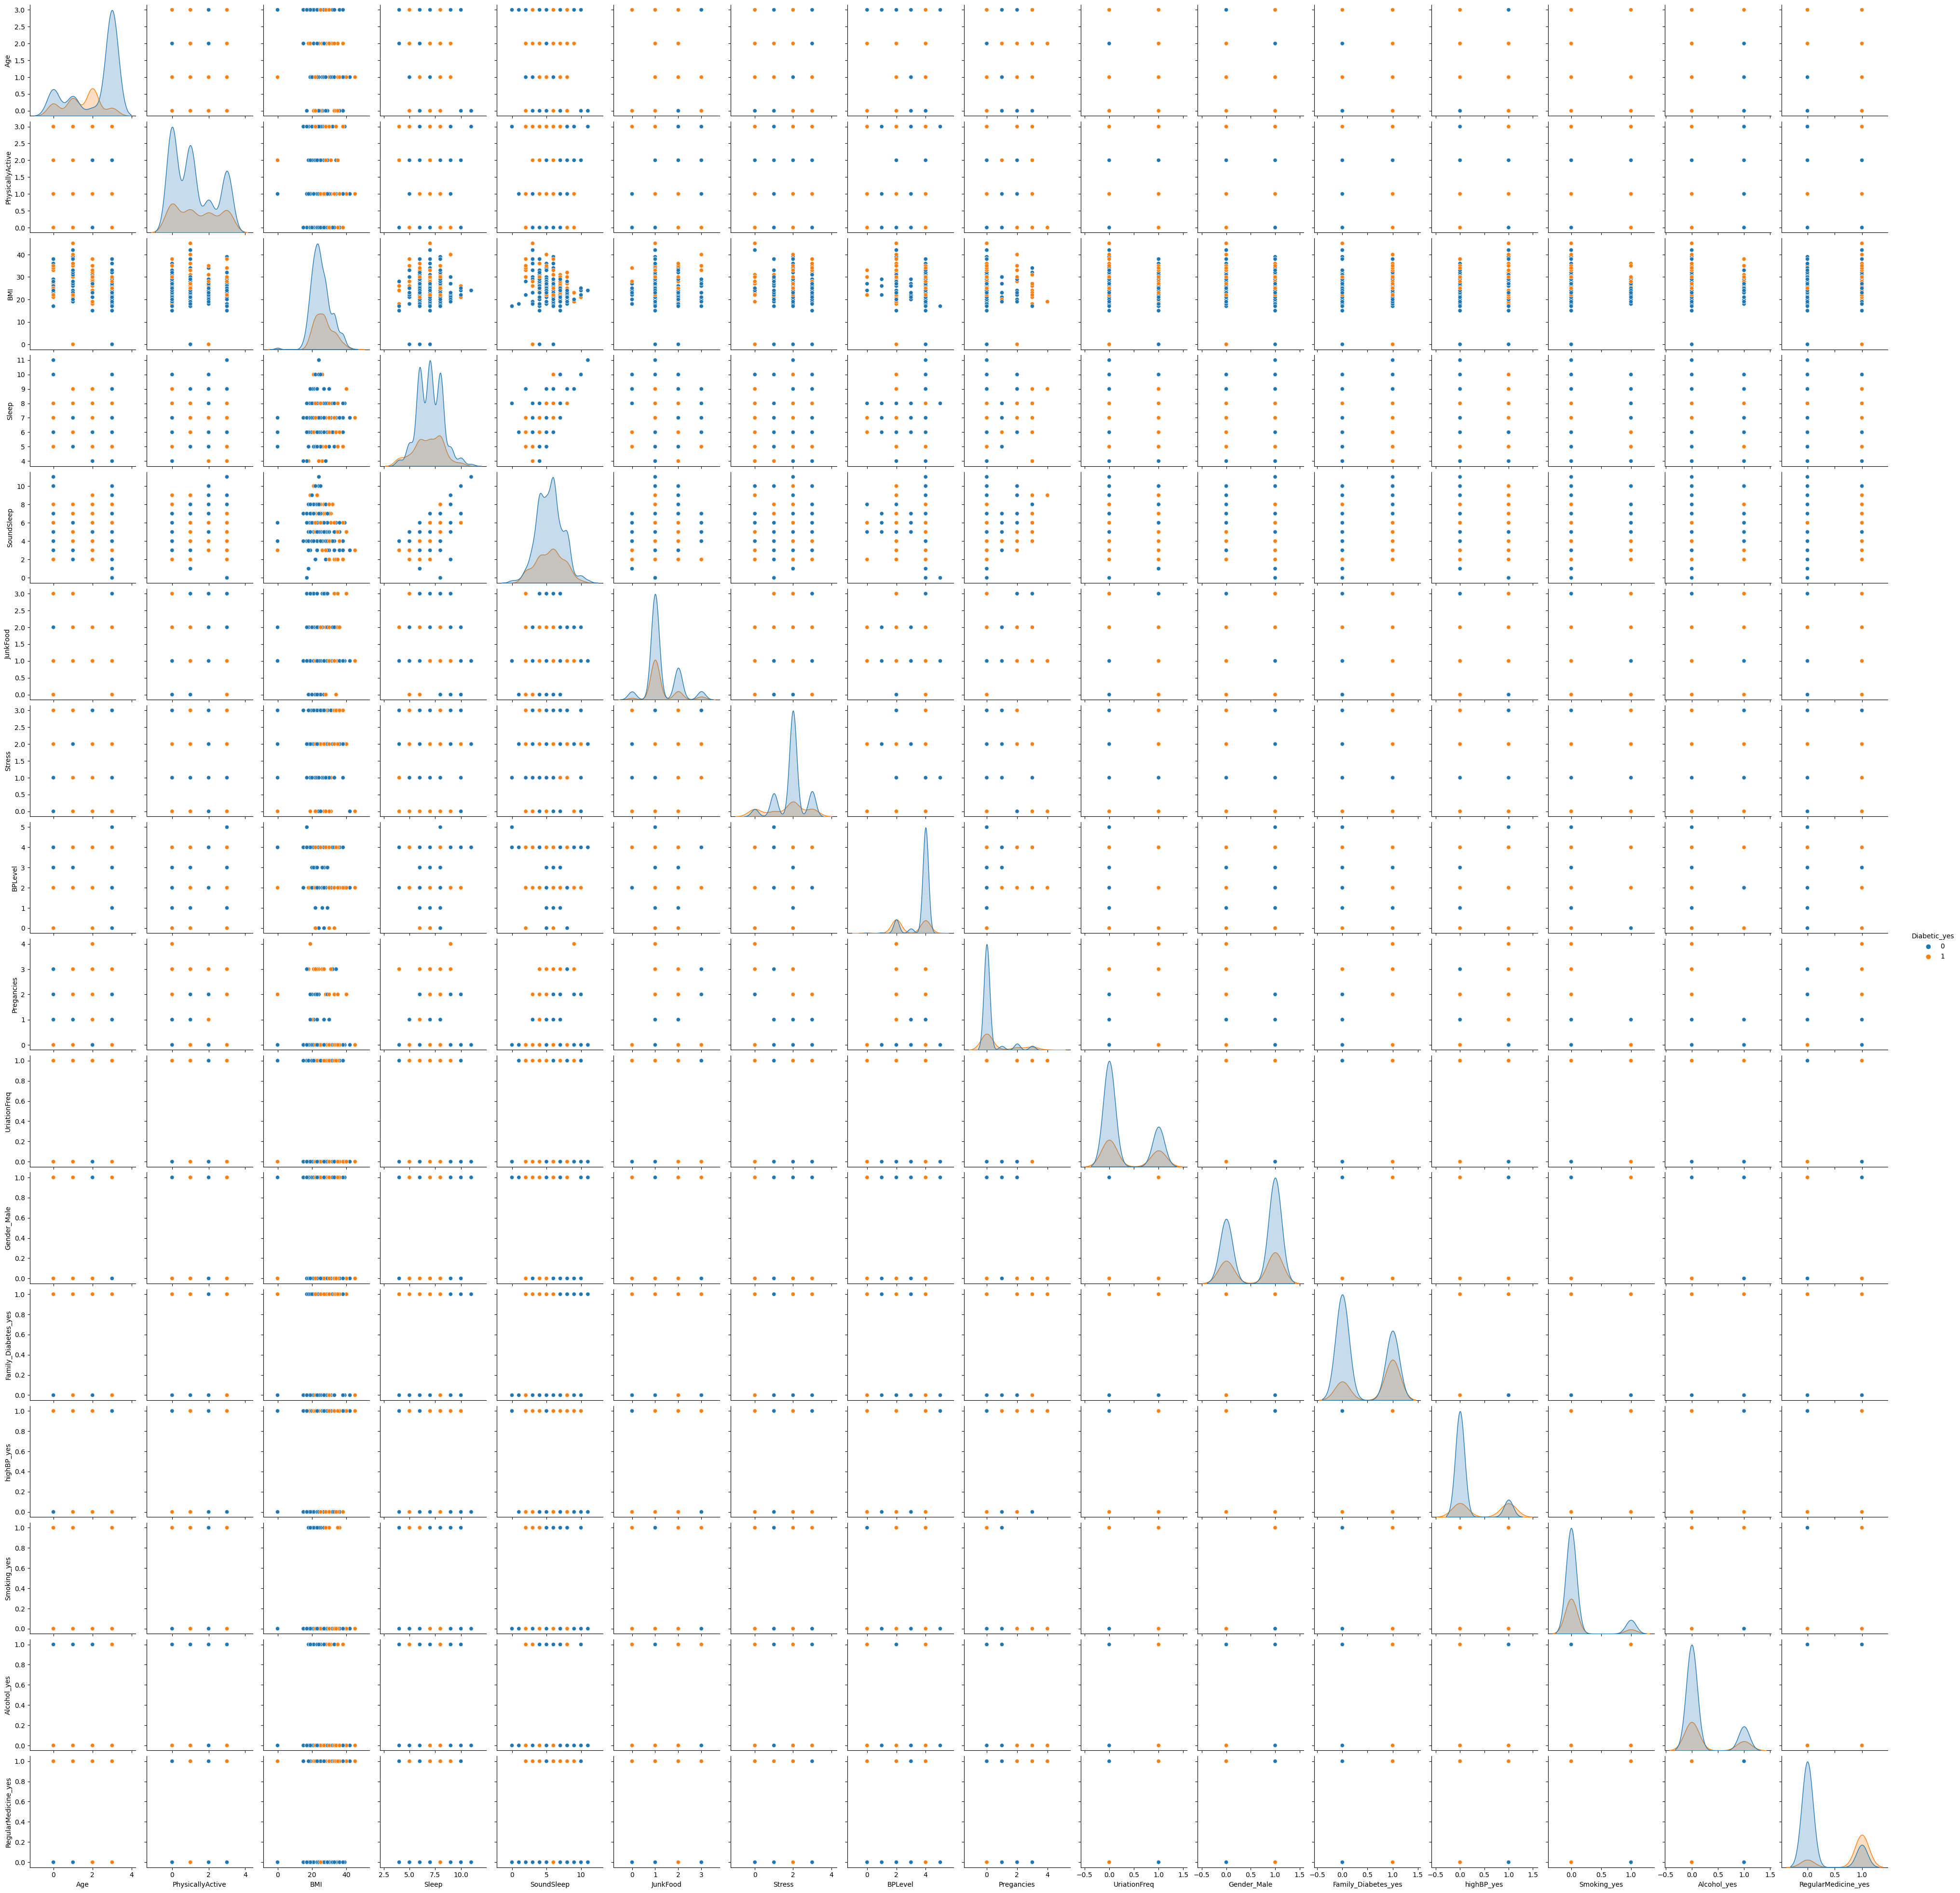

In [11]:
# pair plot
sns.pairplot(diabdata_new, hue = "Diabetic_yes")

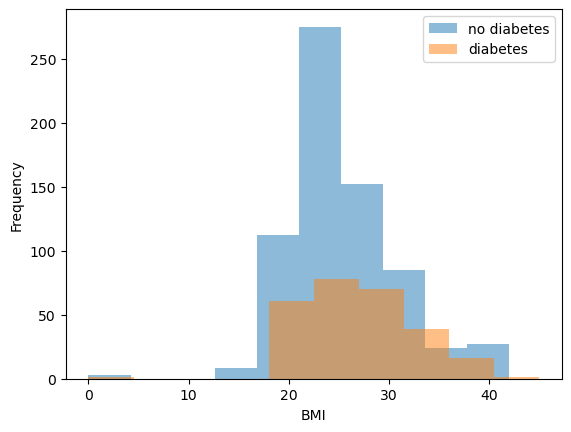

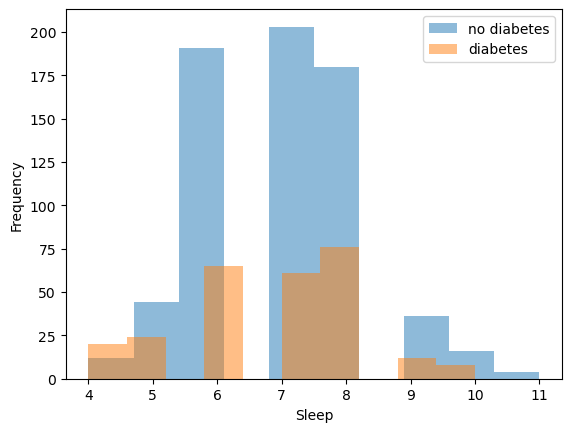

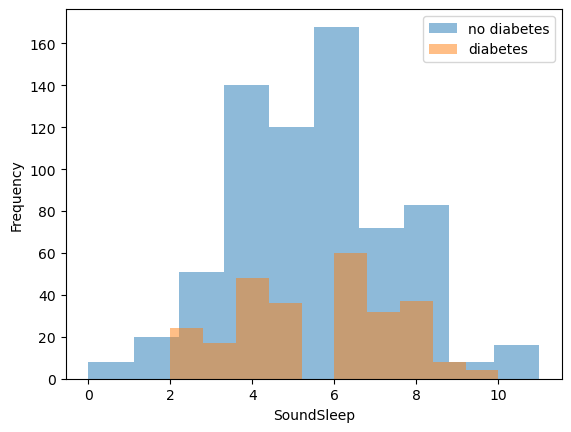

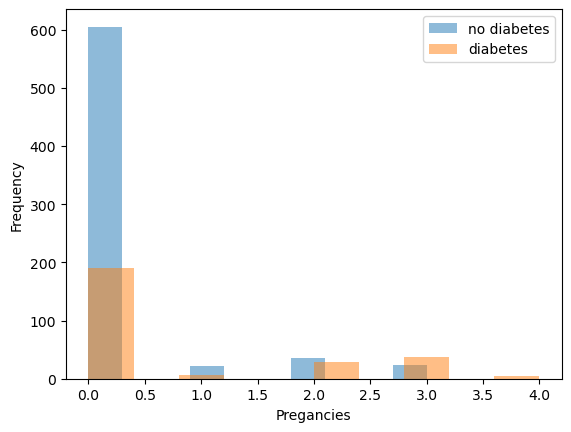

In [12]:
for col in ['BMI', 'Sleep', 'SoundSleep', 'Pregancies']:
    plt.hist(diabdata_new[diabdata_new['Diabetic_yes'] ==  0][col], 10, alpha = 0.5, label = 'no diabetes')
    plt.hist(diabdata_new[diabdata_new['Diabetic_yes'] == 1][col], 10, alpha = 0.5, label = 'diabetes')
    plt.legend(loc = 'upper right')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

<Axes: xlabel='Diabetic_yes', ylabel='count'>

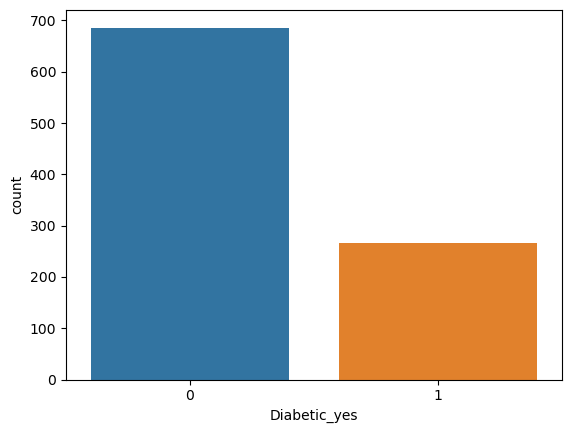

In [13]:
# Counting diabetes outcome
sns.countplot(x = 'Diabetic_yes', data = diabdata_new)

C:\Users\Junhee\AppData\Local\Temp\ipykernel_26576\305731676.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = diabdata_new.corr()


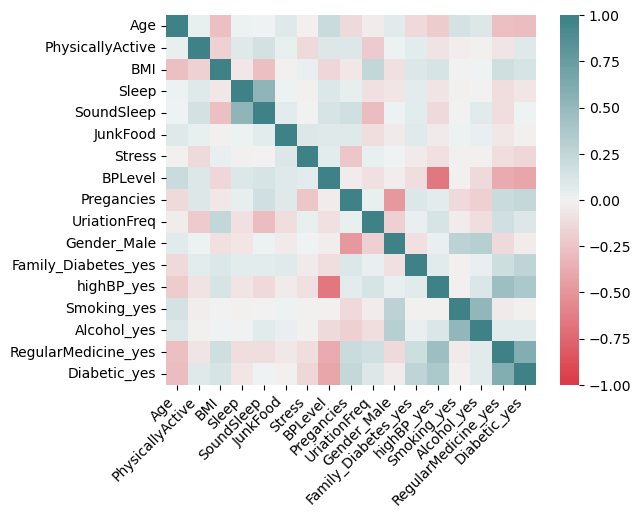

In [14]:
corr = diabdata_new.corr()
corr
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(10, 200, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [15]:
# Dropping low correlation attributes
final_diabdata = diabdata_new.drop(['PhysicallyActive','Sleep','SoundSleep','JunkFood','UriationFreq','Gender_Male','Smoking_yes','Alcohol_yes', 'Pdiabetes'], axis = 1)
final_diabdata

Age   BMI  Stress  BPLevel  Pregancies  Family_Diabetes_yes  highBP_yes  \
0    1.0  39.0     2.0      2.0         0.0                  0.0         1.0   
1    1.0  28.0     2.0      4.0         0.0                  0.0         1.0   
2    0.0  24.0     2.0      4.0         0.0                  0.0         0.0   
3    1.0  23.0     2.0      4.0         0.0                  0.0         0.0   
4    0.0  27.0     2.0      4.0         0.0                  0.0         0.0   
..   ...   ...     ...      ...         ...                  ...         ...   
947  3.0  25.0     2.0      4.0         0.0                  1.0         0.0   
948  2.0  27.0     2.0      2.0         0.0                  1.0         1.0   
949  2.0  23.0     2.0      2.0         0.0                  0.0         1.0   
950  2.0  27.0     3.0      2.0         0.0                  0.0         1.0   
951  2.0  30.0     2.0      2.0         2.0                  1.0         1.0   

     RegularMedicine_yes  Diabetic_yes  
0                    0.0             0  
1                    1.0             0  
2                    0.0             0  
3                    0.0             0  
4                    0.0             0  
..                   ...           ...  
947                  0.0             1  
948                  1.0             1  
949                  1.0             0  
950                  1.0             0  
951                  1.0             1  

[952 rows x 9 columns]

In [16]:
final_diabdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 952 entries, 0 to 951
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  952 non-null    float64
 1   BMI                  952 non-null    float64
 2   Stress               952 non-null    float64
 3   BPLevel              952 non-null    float64
 4   Pregancies           952 non-null    float64
 5   Family_Diabetes_yes  952 non-null    float64
 6   highBP_yes           952 non-null    float64
 7   RegularMedicine_yes  952 non-null    float64
 8   Diabetic_yes         952 non-null    uint8  
dtypes: float64(8), uint8(1)
memory usage: 60.6 KB


In [25]:
# Naive Bayes Model
X = final_diabdata.drop("Diabetic_yes", axis = 1)
y = final_diabdata[["Diabetic_yes"]]

# split dataset into training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 12)

naive_model = GaussianNB()
naive_model.fit(X_train, y_train.values.ravel())
y_pred = naive_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.8272251308900523
              precision    recall  f1-score   support

           0       0.86      0.90      0.88       133
           1       0.75      0.66      0.70        58

    accuracy                           0.83       191
   macro avg       0.80      0.78      0.79       191
weighted avg       0.82      0.83      0.82       191

[[120  13]
 [ 20  38]]


In [24]:
#knn instant with 5 neighbors
knn_classifier = KNeighborsClassifier(n_neighbors = 5)
knn_classifier.fit(X_train, y_train)
y_pred = knn_classifier.predict(X_test) 

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9057591623036649
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       133
           1       0.93      0.74      0.83        58

    accuracy                           0.91       191
   macro avg       0.92      0.86      0.88       191
weighted avg       0.91      0.91      0.90       191

[[130   3]
 [ 15  43]]


C:\Users\Junhee\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [23]:
XMLP = final_diabdata.drop('Diabetic_yes', axis=1)
yMLP = final_diabdata['Diabetic_yes']

#encode categorical variables and scale quantitative
preprocessor_MLP = ColumnTransformer(transformers = [
    ('num', StandardScaler(), yMLP)
])

XMLP_preproc = preprocessor_MLP.fit_transform(XMLP) #apply preprocessing

#train-test 80-20
X_trainMLP, X_testMLP, y_trainMLP, y_testMLP = train_test_split(XMLP_preproc, yMLP, test_size=0.2, random_state=12)
#using standard MLPClassifier activation and solver, as well as hidden layer sizes of 100 neurons for 2 layers
mlp = MLPClassifier(hidden_layer_sizes = (100,100), activation = 'relu', 
                    solver = 'adam', random_state = 12, max_iter=300)

mlp.fit(X_trainMLP, y_trainMLP)
y_predMLP = mlp.predict(X_testMLP)
accMLP = np.mean(y_predMLP == y_testMLP)
accMLP

0.7801047120418848

In [26]:
from sklearn.model_selection import GridSearchCV

activations = ['relu', 'logistic']
solvers = ['sgd', 'adam']
max_iterations = [1000,1100,1200]
hidden_layer_siz = [(5, 7), (7, 13), (13, 10), (100,100)]
learning_rates = 0.01 * np.arange(1, 3)

param_grid = dict(learning_rate_init = learning_rates, hidden_layer_sizes = hidden_layer_siz, max_iter = max_iterations, activation = activations, solver = solvers)
# set model
mlp = MLPClassifier(solver = 'sgd', random_state = 42, activation = 'logistic', learning_rate_init = 0.3, batch_size = 100, hidden_layer_sizes = (12, 3), max_iter = 500)

# For Grid Search
grid = GridSearchCV(estimator = mlp, param_grid = param_grid)

grid.fit(X_trainMLP,y_trainMLP)

print("Optimal Hyper-parameters : ", grid.best_params_)
print("Optimal Accuracy : ", grid.best_score_)

Optimal Hyper-parameters :  {'activation': 'logistic', 'hidden_layer_sizes': (100, 100), 'learning_rate_init': 0.01, 'max_iter': 1000, 'solver': 'adam'}
Optimal Accuracy :  0.8212762297901618


In [69]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import OneClassSVM
from numpy import where
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [70]:
diabdata = pd.read_csv('diabetes_dataset__2019.csv')

In [71]:
diabdata.head()

Age Gender Family_Diabetes highBP      PhysicallyActive   BMI Smoking  \
0  50-59   Male              no    yes        one hr or more  39.0      no   
1  50-59   Male              no    yes  less than half an hr  28.0      no   
2  40-49   Male              no     no        one hr or more  24.0      no   
3  50-59   Male              no     no        one hr or more  23.0      no   
4  40-49   Male              no     no  less than half an hr  27.0      no   

  Alcohol  Sleep  SoundSleep RegularMedicine      JunkFood     Stress BPLevel  \
0      no      8           6              no  occasionally  sometimes    high   
1      no      8           6             yes    very often  sometimes  normal   
2      no      6           6              no  occasionally  sometimes  normal   
3      no      8           6              no  occasionally  sometimes  normal   
4      no      8           8              no  occasionally  sometimes  normal   

   Pregancies Pdiabetes UriationFreq Diabetic  
0         0.0         0     not much       no  
1         0.0         0     not much       no  
2         0.0         0     not much       no  
3         0.0         0     not much       no  
4         0.0         0     not much       no

In [72]:
diabdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 952 entries, 0 to 951
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               952 non-null    object 
 1   Gender            952 non-null    object 
 2   Family_Diabetes   952 non-null    object 
 3   highBP            952 non-null    object 
 4   PhysicallyActive  952 non-null    object 
 5   BMI               948 non-null    float64
 6   Smoking           952 non-null    object 
 7   Alcohol           952 non-null    object 
 8   Sleep             952 non-null    int64  
 9   SoundSleep        952 non-null    int64  
 10  RegularMedicine   952 non-null    object 
 11  JunkFood          952 non-null    object 
 12  Stress            952 non-null    object 
 13  BPLevel           952 non-null    object 
 14  Pregancies        910 non-null    float64
 15  Pdiabetes         951 non-null    object 
 16  UriationFreq      952 non-null    object 
 1

In [101]:
# change diabetic to 0 and 1
diabdata = diabdata.replace({'Diabetic': {'yes': 1, 'no': 0}})
diabdata.Diabetic

0      0
1      0
2      0
3      0
4      0
      ..
947    1
948    1
949    0
950    0
951    1
Name: Diabetic, Length: 952, dtype: object

In [80]:
# total rows(observations) and columns(attributess)
diabdata.shape

(952, 18)

In [81]:
# summary statistics for quantiative variables
diabdata.describe()

BMI       Sleep  SoundSleep  Pregancies
count  948.000000  952.000000  952.000000  910.000000
mean    25.763713    6.949580    5.495798    0.386813
std      5.402595    1.273189    1.865618    0.909455
min     15.000000    4.000000    0.000000    0.000000
25%     22.000000    6.000000    4.000000    0.000000
50%     25.000000    7.000000    6.000000    0.000000
75%     29.000000    8.000000    7.000000    0.000000
max     45.000000   11.000000   11.000000    4.000000

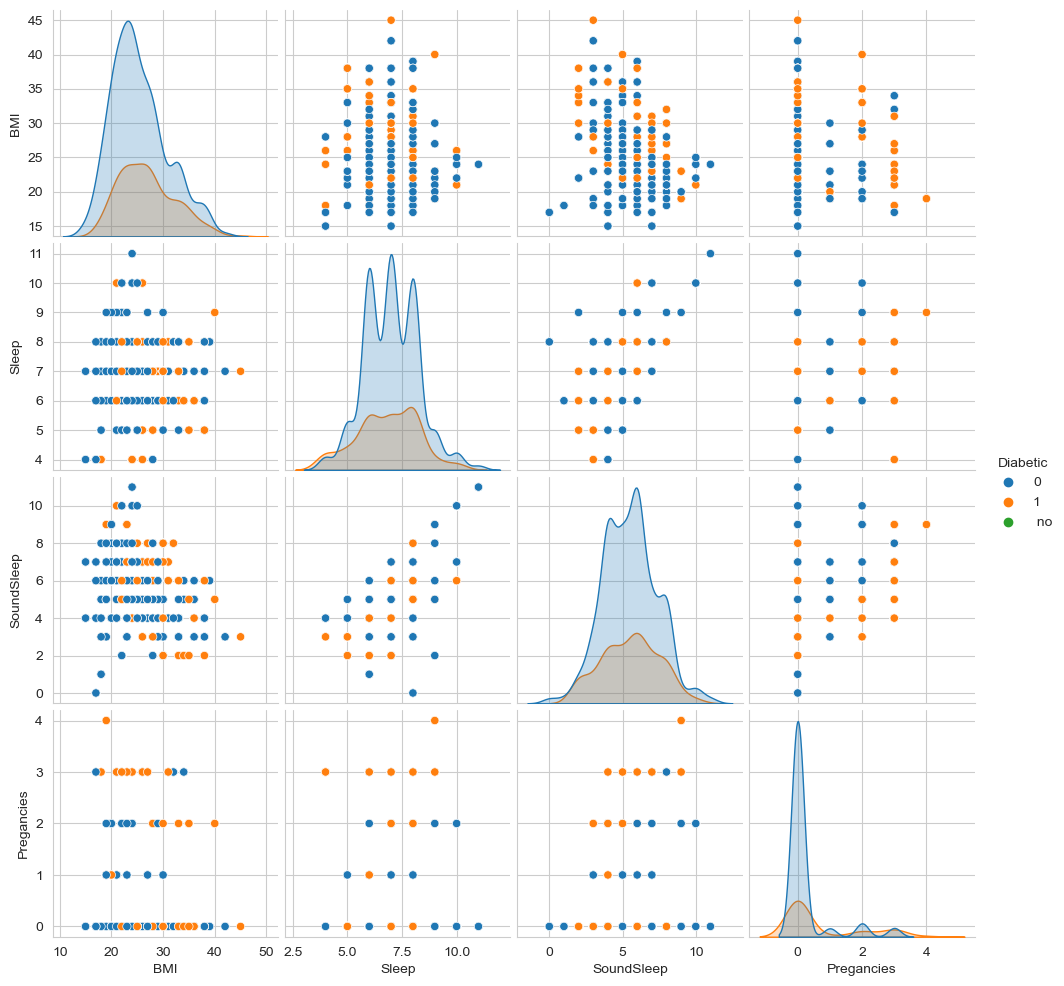

In [96]:
# pair plot
sns.pairplot(diabdata, hue = "Diabetic")

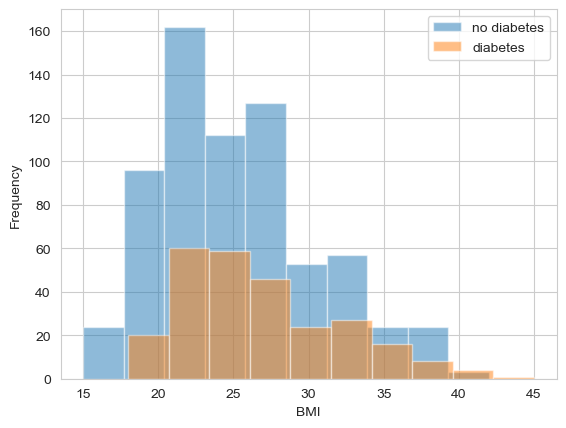

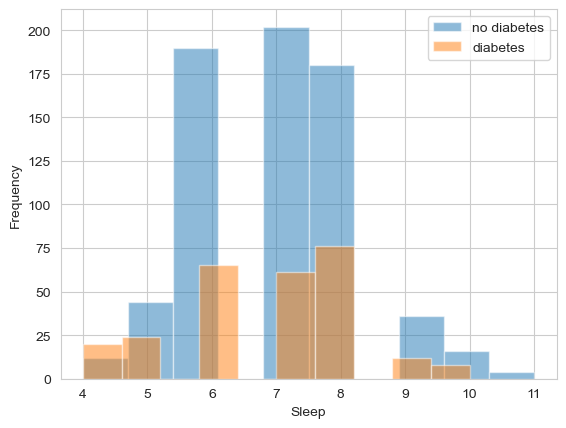

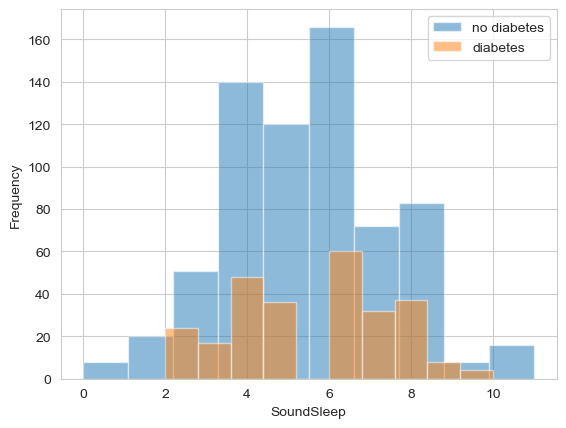

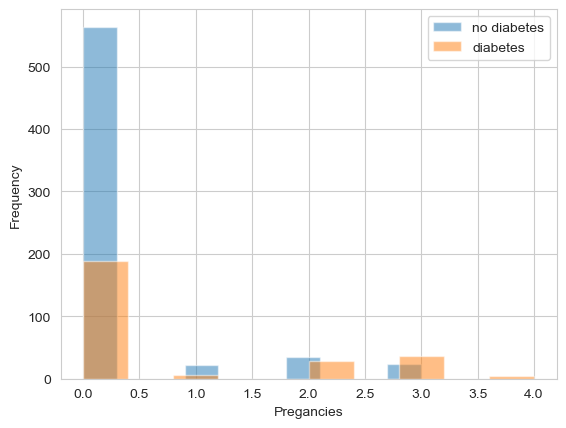

In [97]:
for col in ['BMI', 'Sleep', 'SoundSleep', 'Pregancies']:
    plt.hist(diabdata[diabdata['Diabetic'] ==  0][col], 10, alpha = 0.5, label = 'no diabetes')
    plt.hist(diabdata[diabdata['Diabetic'] == 1][col], 10, alpha = 0.5, label = 'diabetes')
    plt.legend(loc = 'upper right')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

<Axes: xlabel='Diabetic', ylabel='count'>

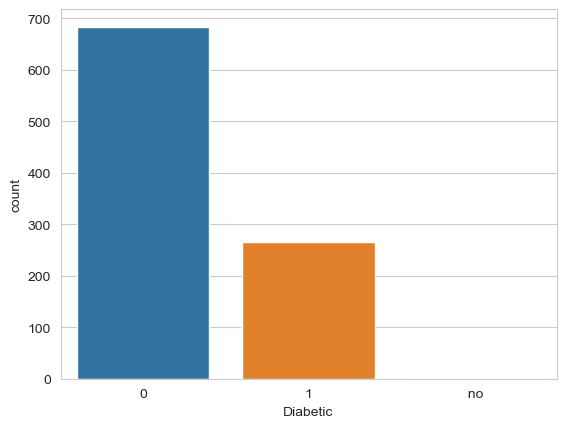

In [85]:
# Counting diabetes outcome
sns.countplot(x = 'Diabetic', data = diabdata)
# not sure why there is 2 separate No

C:\Users\hyuna\AppData\Local\Temp\ipykernel_1816\533892526.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(diabdata.corr(), annot = True)


<Axes: >

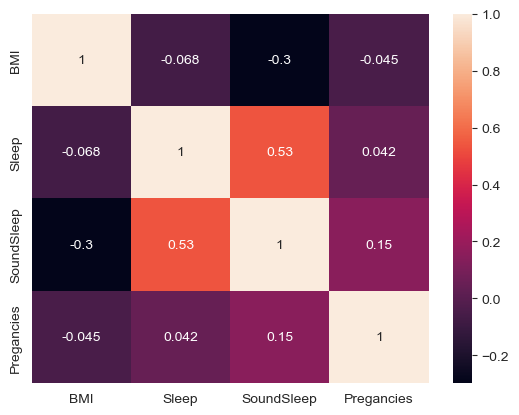

In [88]:
sns.heatmap(diabdata.corr(), annot = True)

In [7]:
#compute a simple cross tabulation of two (or more) factors
cross_tab_junk_stress = pd.crosstab(diabdata['JunkFood'], diabdata['Stress']) 
#want only first two values of tuple returned from chi2_contingency
#This function computes the chi-square statistic and p-value for the 
#hypothesis test of independence of the observed frequencies in the contingency table
chi2, p_value, df, expvals = chi2_contingency(cross_tab_junk_stress)
print("Chi-square:", chi2)
print("P-value:", p_value)
#We can assume from the low p value that junk food and stress are associated
#However, we will use both since their nature is different

Chi-square: 94.09466967499688
P-value: 2.4470337530291514e-16


In [8]:
cross_tab_junk_blood = pd.crosstab(diabdata['JunkFood'], diabdata['BPLevel']) 
chi2, p_value, df, expvals = chi2_contingency(cross_tab_junk_blood)
print("Chi-square:", chi2)
print("P-value:", p_value)
#Here, we see that junk food as blood pressure are not that highly correlated because the p-val > 0.05
#The chi-square value is also relatively low, demonstraing the above

Chi-square: 24.951722830335264
P-value: 0.05059555690352423


In [9]:
cross_tab_high_blood = pd.crosstab(diabdata['highBP'], diabdata['BPLevel']) 
chi2, p_value, df, expvals = chi2_contingency(cross_tab_high_blood)
print("Chi-square:", chi2)
print("P-value:", p_value)
#As expetced, the variables highBP and BPlevels are highly correlated because they relate both to blood pressure
#Because of the extremely high chi-square and low p-val we are likely to omit one of the two

Chi-square: 482.23875003776743
P-value: 5.439974203257661e-102


In [10]:
diabdata.dropna(subset = ['BMI', 'Sleep', 'SoundSleep'], inplace=True) #drops nan values from quantitative variables for now
diab_quant = diabdata[['BMI', 'Sleep', 'SoundSleep']] #the quantiative variables we want
target = diabdata['Diabetic'] #the label we want to predict
lab_encoder = LabelEncoder() #encode target labels with value between 0 and n_classes-1
target = lab_encoder.fit_transform(target) #transform target lab encoded
#split into 80% train 20% test
X_train, X_test, y_train, y_test = train_test_split(diab_quant, target, test_size = 0.2, random_state = 12)
#knn instant with 5 neighbors
knn_classifier = KNeighborsClassifier(n_neighbors = 5)
knn_classifier.fit(X_train, y_train)
y_pred = knn_classifier.predict(X_test) #show original yes/no's instead of 1/2's
predicted = lab_encoder.inverse_transform(y_pred)
true = lab_encoder.inverse_transform(y_test)
for pred, true in zip(predicted, true):
    print(f"Predicted: {pred}\tTrue: {true}")

Predicted: no	True: no
Predicted: no	True: yes
Predicted: no	True: no
Predicted: no	True: no
Predicted: yes	True: yes
Predicted: no	True: no
Predicted: no	True: no
Predicted: yes	True: yes
Predicted: yes	True: no
Predicted: no	True: no
Predicted: no	True: no
Predicted: yes	True: yes
Predicted: no	True: no
Predicted: yes	True: yes
Predicted: yes	True: no
Predicted: no	True: no
Predicted: no	True: yes
Predicted: no	True: no
Predicted: no	True: no
Predicted: no	True: no
Predicted: yes	True: no
Predicted: no	True: no
Predicted: no	True: no
Predicted: no	True: no
Predicted: no	True: no
Predicted: no	True: no
Predicted: no	True: no
Predicted: yes	True: yes
Predicted: no	True: yes
Predicted: no	True: no
Predicted: yes	True: yes
Predicted: no	True: no
Predicted: no	True: no
Predicted: no	True: no
Predicted: no	True: yes
Predicted: no	True: no
Predicted: no	True: no
Predicted: no	True: no
Predicted: yes	True: yes
Predicted: no	True: no
Predicted: no	True: yes
Predicted: no	True: no
Predicted: n

In [11]:
true_labs = lab_encoder.inverse_transform(y_test) #there was an issue if I didn't inverse transform
predicted = predicted
conf_mat = confusion_matrix(true_labs, predicted)
conf_mat

array([[121,  18],
       [ 23,  28]], dtype=int64)

In [12]:
acc_sco = accuracy_score(true_labs, predicted)
acc_sco

0.7842105263157895

In [13]:
XMLP = diabdata.drop('Diabetic', axis=1)
yMLP = diabdata['Diabetic']
cat_MLP = ['Gender', 'Family_Diabetes', 'PhysicallyActive', 'Smoking', 'Alcohol', 'JunkFood', 'BPLevel']
num_MLP = ['BMI','Sleep','SoundSleep']
#encode categorical variables and scale quantitative
preprocessor_MLP = ColumnTransformer(transformers = [
    ('cat', OneHotEncoder(), cat_MLP),
    ('num', StandardScaler(), num_MLP)
])
XMLP_preproc = preprocessor_MLP.fit_transform(XMLP) #apply preprocessing

#train-test 80-20
X_trainMLP, X_testMLP, y_trainMLP, y_testMLP = train_test_split(XMLP_preproc, yMLP, test_size=0.2, random_state=12)
#using standard MLPClassifier activation and solver, as well as hidden layer sizes of 100 neurons for 2 layers
mlp = MLPClassifier(hidden_layer_sizes = (100,100), activation = 'relu', 
                    solver = 'adam', random_state = 12, max_iter=300)

mlp.fit(X_trainMLP, y_trainMLP)
y_predMLP = mlp.predict(X_testMLP)
accMLP = np.mean(y_predMLP == y_testMLP)
accMLP

0.9631578947368421

In [32]:
from sklearn.model_selection import GridSearchCV

activations = ['relu', 'logistic']
solvers = ['sgd', 'adam']
max_iterations = [1000,1100,1200]
hidden_layer_siz = [(5, 7), (7, 13), (13, 10), (100,100)]
learning_rates = 0.01 * np.arange(1, 3)

param_grid = dict(learning_rate_init = learning_rates, hidden_layer_sizes = hidden_layer_siz, max_iter = max_iterations, activation = activations, solver = solvers)
# set model
mlp = MLPClassifier(solver = 'sgd', random_state = 42, activation = 'logistic', learning_rate_init = 0.3, batch_size = 100, hidden_layer_sizes = (12, 3), max_iter = 500)

# For Grid Search
grid = GridSearchCV(estimator = mlp, param_grid = param_grid)

grid.fit(X_trainMLP,y_trainMLP)

print("Optimal Hyper-parameters : ", grid.best_params_)
print("Optimal Accuracy : ", grid.best_score_)

c:\Users\jpsal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Optimal Hyper-parameters :  {'activation': 'logistic', 'hidden_layer_sizes': (100, 100), 'learning_rate_init': 0.02, 'max_iter': 1000, 'solver': 'adam'}
Optimal Accuracy :  0.922168002788428


[7.33986837] [[-0.01601273]]
Degree  1  Training RMSE:  1.2666461664387465
Training R2:  0.005187042859310598
[7.33986837] [[-0.01601273]]
Degree  1  Testing RMSE:  1.2898506872754183
Testing R2:  -0.015662830974160435


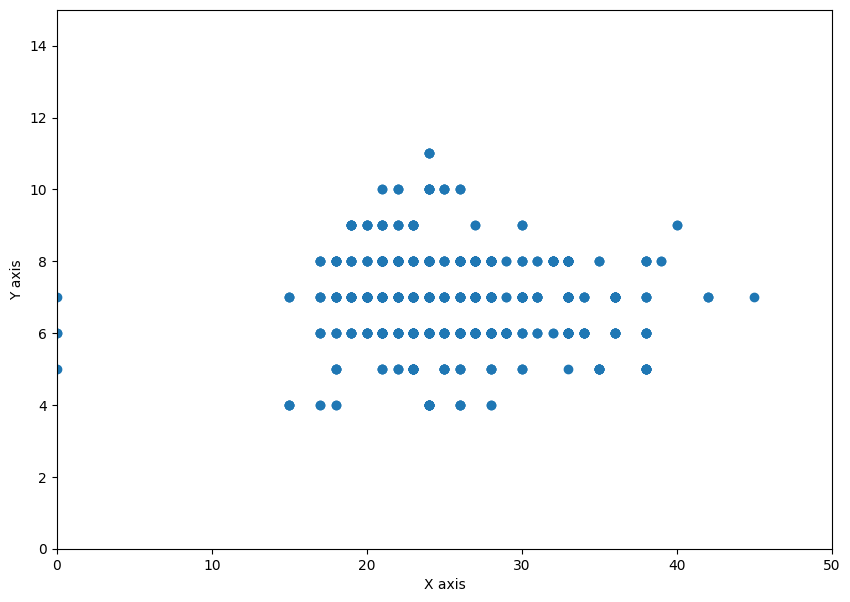

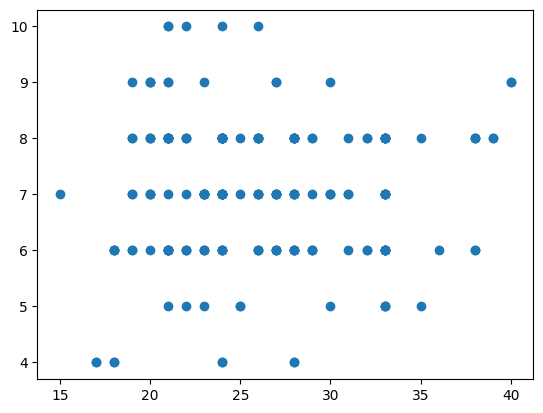

[6.17310614] [[ 0.0784566  -0.00181925]]
Degree  2  Training RMSE:  1.2617115100016216
Training R2:  0.012923217057146719
[6.17310614] [[ 0.0784566  -0.00181925]]
Degree  2  Testing RMSE:  1.2944497045391694
Testing R2:  -0.022918520884438243


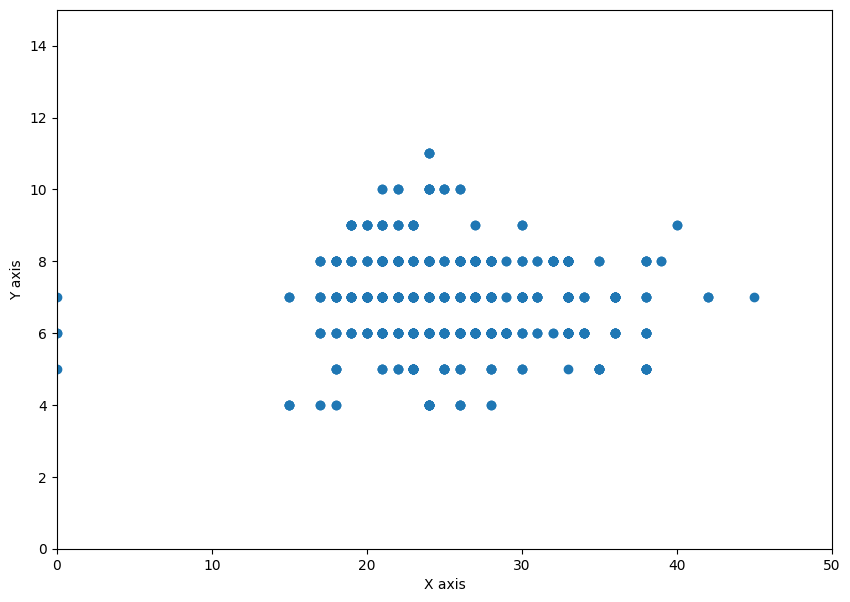

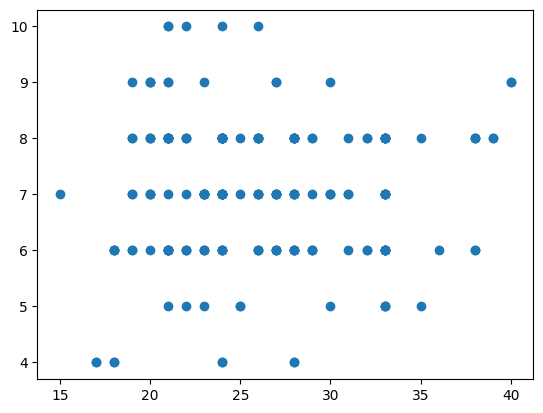

[5.62283175] [[ 1.90766248e-01 -7.68418025e-03  8.85630911e-05]]
Degree  3  Training RMSE:  1.2594685171562126
Training R2:  0.01642962590374264
[5.62283175] [[ 1.90766248e-01 -7.68418025e-03  8.85630911e-05]]
Degree  3  Testing RMSE:  1.289704879967529
Testing R2:  -0.015433218827090922


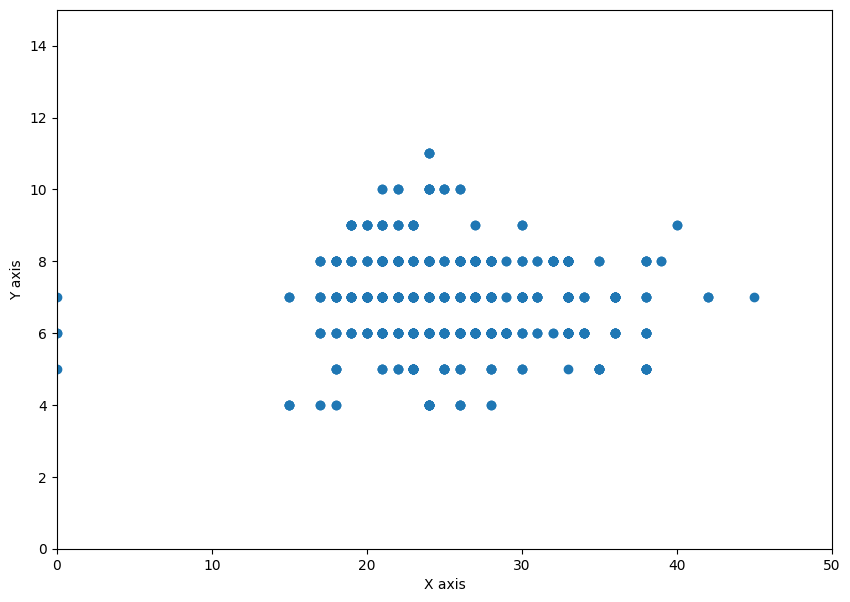

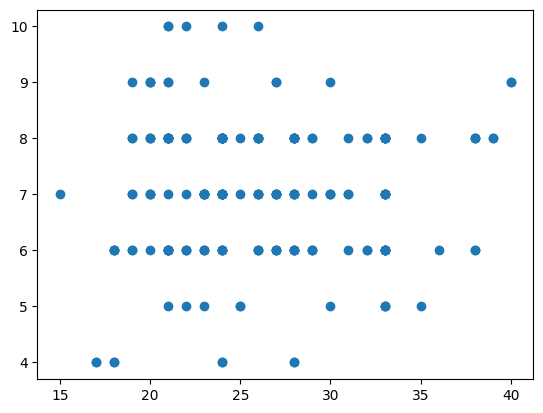

[5.87133334] [[-1.35007718e-01  2.57287255e-02 -1.06066140e-03  1.29033266e-05]]
Degree  4  Training RMSE:  1.2553332380603202
Training R2:  0.022877839098169095
[5.87133334] [[-1.35007718e-01  2.57287255e-02 -1.06066140e-03  1.29033266e-05]]
Degree  4  Testing RMSE:  1.2776339847373364
Testing R2:  0.0034855711619083962


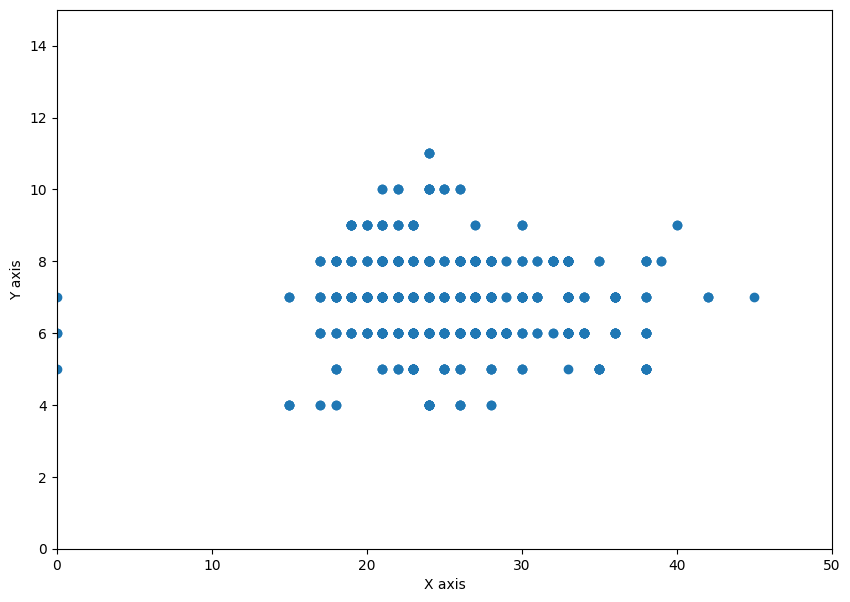

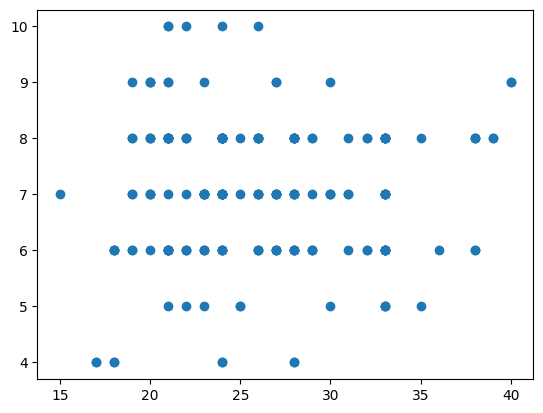

In [24]:
df = pd.read_csv('diabetes_dataset__2019.csv')
df = df.drop(columns=['Age', 'Gender', 'Family_Diabetes', 'highBP', 'PhysicallyActive', 'Smoking', 'Alcohol', 'SoundSleep', 'RegularMedicine', 'JunkFood', 'Stress', 'BPLevel', 'Pregancies', 'Pdiabetes', 'UriationFreq', 'Diabetic'])
df = df.sort_values('BMI')
df = df.fillna(0)
train, test = train_test_split(df, test_size=0.2, random_state=21)
train = train.sort_values('BMI')
test = test.sort_values('BMI')
X_train, y_train = train.drop(columns=['Sleep']), train['Sleep']
X_test, y_test = test.drop(columns=['Sleep']), test['Sleep']

for i in range(1,5):
    poly = PolynomialFeatures(degree=i, include_bias=False)
    X_poly = poly.fit_transform(np.asarray(X_train).reshape(-1, 1))
    plr = LinearRegression()

    plr.fit(X_poly, np.asarray(y_train).reshape(-1, 1))
    
    predicted1 = plr.predict(poly.transform(np.asarray(X_train).reshape(-1, 1)))
    #here is how you get the intercept and the coef.
    print(plr.intercept_, plr.coef_)
    print("Degree " , i , " Training RMSE: " , mean_squared_error(predicted1, np.asarray(y_train).reshape(-1, 1), squared=False))
    print("Training R2: ", r2_score(y_train, predicted1))
    X_poly = poly.fit_transform(np.asarray(X_train).reshape(-1, 1))
    plr = LinearRegression()

    plr.fit(X_poly, np.asarray(y_train).reshape(-1, 1))
    
    predicted2 = plr.predict(poly.transform(np.asarray(X_test).reshape(-1, 1)))
    #here is how you get the intercept and the coef.
    print(plr.intercept_, plr.coef_)
    print("Degree " , i , " Testing RMSE: ", mean_squared_error(predicted2, np.asarray(y_test).reshape(-1, 1), squared=False))
    print("Testing R2: ", r2_score(y_test, predicted2))

    plt.figure(figsize=(10, 7))
    
    # Plot the input data points
    plt.scatter(X_train, y_train)
    
    # Set the x-axis and y-axis limits
    plt.xlim(0, 50)
    plt.ylim(0, 15)
    
    # Construct a string representation of the gradient descent solution using the parameters
    
    # Set the title, x-axis label, and y-axis label for the plot
    plt.xlabel('X axis')
    plt.ylabel('Y axis')
    
    # Display the plot
    plt.show()
    
    # Plot the input data points
    plt.scatter(X_test, y_test)
    plt.show()


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import OneClassSVM
from numpy import where
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [2]:
diabdata = pd.read_csv('diabetes_dataset__2019.csv')

In [3]:
diabdata.head(20)

Age  Gender Family_Diabetes highBP      PhysicallyActive   BMI   
0          50-59    Male              no    yes        one hr or more  39.0  \
1          50-59    Male              no    yes  less than half an hr  28.0   
2          40-49    Male              no     no        one hr or more  24.0   
3          50-59    Male              no     no        one hr or more  23.0   
4          40-49    Male              no     no  less than half an hr  27.0   
5          40-49    Male              no    yes                  none  21.0   
6   less than 40    Male              no     no        one hr or more  24.0   
7   less than 40    Male              no     no  less than half an hr  20.0   
8          40-49    Male             yes     no        one hr or more  23.0   
9   less than 40    Male              no     no  more than half an hr  20.0   
10  less than 40    Male              no     no                  none  20.0   
11         40-49    Male              no     no  less than half an hr  26.0   
12  less than 40  Female              no     no  less than half an hr  21.0   
13  less than 40  Female              no     no        one hr or more  22.0   
14  less than 40    Male              no     no        one hr or more  15.0   
15         40-49  Female             yes     no                  none  34.0   
16         50-59    Male             yes     no  more than half an hr  22.0   
17  less than 40  Female              no     no  more than half an hr  24.0   
18         40-49    Male             yes     no        one hr or more  24.0   
19  less than 40    Male             yes     no        one hr or more  22.0   

   Smoking Alcohol  Sleep  SoundSleep RegularMedicine      JunkFood   
0       no      no      8           6              no  occasionally  \
1       no      no      8           6             yes    very often   
2       no      no      6           6              no  occasionally   
3       no      no      8           6              no  occasionally   
4       no      no      8           8              no  occasionally   
5       no     yes     10          10              no  occasionally   
6       no      no      8           8              no  occasionally   
7       no      no      7           7             yes  occasionally   
8       no      no      7           7              no  occasionally   
9       no      no      8           8               o  occasionally   
10      no      no      7           7              no  occasionally   
11     yes      no      8           7              no  occasionally   
12      no      no      6           6              no  occasionally   
13      no      no      8           7              no  occasionally   
14      no      no      7           7              no  occasionally   
15      no      no      6           6              no  occasionally   
16      no      no      7           6              no  occasionally   
17      no      no      6           6              no  occasionally   
18      no      no     11          11              no  occasionally   
19      no      no      8           6              no         often   

        Stress BPLevel  Pregancies Pdiabetes UriationFreq Diabetic  
0    sometimes    high         0.0         0     not much       no  
1    sometimes  normal         0.0         0     not much       no  
2    sometimes  normal         0.0         0     not much       no  
3    sometimes  normal         0.0         0     not much       no  
4    sometimes  normal         0.0         0     not much       no  
5    sometimes    high         0.0         0     not much      yes  
6    sometimes  normal         0.0         0     not much       no  
7    sometimes     low         0.0         0     not much       no  
8    sometimes  normal         0.0         0     not much       no  
9    sometimes  normal         0.0         0     not much       no  
10  not at all  normal         0.0         0     not much       no  
11   sometimes  normal         0.

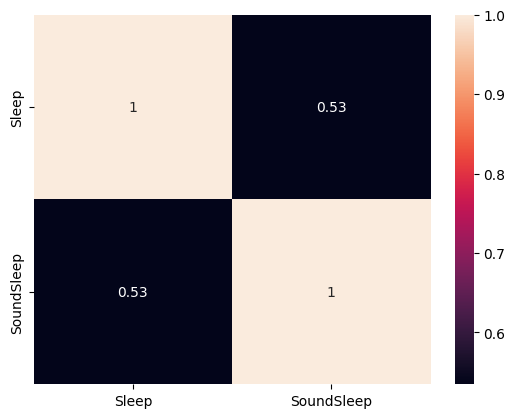

In [4]:
corr_sleep_df = diabdata[['Sleep', 'SoundSleep']] #select sleep and soundsleep
corr_sleep_mat = corr_sleep_df.corr() #correlation matrix btw two variables
sns.heatmap(corr_sleep_mat, annot=True)
plt.show()

In [5]:
#compute a simple cross tabulation of two (or more) factors
cross_tab_junk_stress = pd.crosstab(diabdata['JunkFood'], diabdata['Stress']) 
#want only first two values of tuple returned from chi2_contingency
#This function computes the chi-square statistic and p-value for the 
#hypothesis test of independence of the observed frequencies in the contingency table
chi2, p_value, df, expvals = chi2_contingency(cross_tab_junk_stress)
print("Chi-square:", chi2)
print("P-value:", p_value)
#We can assume from the low p value that junk food and stress are associated
#However, we will use both since their nature is different

Chi-square: 94.09466967499688
P-value: 2.4470337530291514e-16


In [6]:
cross_tab_junk_blood = pd.crosstab(diabdata['JunkFood'], diabdata['BPLevel']) 
chi2, p_value, df, expvals = chi2_contingency(cross_tab_junk_blood)
print("Chi-square:", chi2)
print("P-value:", p_value)
#Here, we see that junk food as blood pressure are not that highly correlated because the p-val > 0.05
#The chi-square value is also relatively low, demonstraing the above

Chi-square: 24.951722830335264
P-value: 0.05059555690352423


In [7]:
cross_tab_high_blood = pd.crosstab(diabdata['highBP'], diabdata['BPLevel']) 
chi2, p_value, df, expvals = chi2_contingency(cross_tab_high_blood)
print("Chi-square:", chi2)
print("P-value:", p_value)
#As expetced, the variables highBP and BPlevels are highly correlated because they relate both to blood pressure
#Because of the extremely high chi-square and low p-val we are likely to omit one of the two

Chi-square: 482.23875003776743
P-value: 5.439974203257661e-102


In [8]:
diabdata.dropna(subset = ['BMI', 'Sleep', 'SoundSleep'], inplace=True) #drops nan values from quantitative variables for now
diab_quant = diabdata[['BMI', 'Sleep', 'SoundSleep']] #the quantiative variables we want
target = diabdata['Diabetic'] #the label we want to predict
lab_encoder = LabelEncoder() #encode target labels with value between 0 and n_classes-1
target = lab_encoder.fit_transform(target) #transform target lab encoded
#split into 80% train 20% test
X_train, X_test, y_train, y_test = train_test_split(diab_quant, target, test_size = 0.2, random_state = 12)
#knn instant with 5 neighbors
knn_classifier = KNeighborsClassifier(n_neighbors = 5)
knn_classifier.fit(X_train, y_train)
y_pred = knn_classifier.predict(X_test) #show original yes/no's instead of 1/2's
predicted = lab_encoder.inverse_transform(y_pred)
true = lab_encoder.inverse_transform(y_test)
for pred, true in zip(predicted, true):
    print(f"Predicted: {pred}\tTrue: {true}")

Predicted: no	True: no
Predicted: no	True: yes
Predicted: no	True: no
Predicted: no	True: no
Predicted: yes	True: yes
Predicted: no	True: no
Predicted: no	True: no
Predicted: yes	True: yes
Predicted: yes	True: no
Predicted: no	True: no
Predicted: no	True: no
Predicted: yes	True: yes
Predicted: no	True: no
Predicted: yes	True: yes
Predicted: yes	True: no
Predicted: no	True: no
Predicted: no	True: yes
Predicted: no	True: no
Predicted: no	True: no
Predicted: no	True: no
Predicted: yes	True: no
Predicted: no	True: no
Predicted: no	True: no
Predicted: no	True: no
Predicted: no	True: no
Predicted: no	True: no
Predicted: no	True: no
Predicted: yes	True: yes
Predicted: no	True: yes
Predicted: no	True: no
Predicted: yes	True: yes
Predicted: no	True: no
Predicted: no	True: no
Predicted: no	True: no
Predicted: no	True: yes
Predicted: no	True: no
Predicted: no	True: no
Predicted: no	True: no
Predicted: yes	True: yes
Predicted: no	True: no
Predicted: no	True: yes
Predicted: no	True: no
Predicted: n

In [9]:
true_labs = lab_encoder.inverse_transform(y_test) #there was an issue if I didn't inverse transform
predicted = predicted
conf_mat = confusion_matrix(true_labs, predicted)
conf_mat

array([[121,  18],
       [ 23,  28]], dtype=int64)

In [10]:
acc_sco = accuracy_score(true_labs, predicted)
acc_sco

0.7842105263157895

In [11]:
XMLP = diabdata.drop('Diabetic', axis=1)
yMLP = diabdata['Diabetic']
cat_MLP = ['Gender', 'Family_Diabetes', 'PhysicallyActive', 'Smoking', 'Alcohol', 'JunkFood', 'BPLevel']
num_MLP = ['BMI','Sleep','SoundSleep']
#encode categorical variables and scale quantitative
preprocessor_MLP = ColumnTransformer(transformers = [
    ('cat', OneHotEncoder(), cat_MLP),
    ('num', StandardScaler(), num_MLP)
])
XMLP_preproc = preprocessor_MLP.fit_transform(XMLP) #apply preprocessing

#train-test 80-20
X_trainMLP, X_testMLP, y_trainMLP, y_testMLP = train_test_split(XMLP_preproc, yMLP, test_size=0.2, random_state=12)
#using standard MLPClassifier activation and solver, as well as hidden layer sizes of 100 neurons for 2 layers
mlp = MLPClassifier(hidden_layer_sizes = (100,100), activation = 'relu', 
                    solver = 'adam', random_state = 12, max_iter=300)

mlp.fit(X_trainMLP, y_trainMLP)
y_predMLP = mlp.predict(X_testMLP)
accMLP = np.mean(y_predMLP == y_testMLP)
accMLP

0.9631578947368421

In [12]:
from sklearn.model_selection import GridSearchCV

activations = ['relu', 'logistic', 'tanh']
solvers = ['sgd', 'adam']
max_iterations = [1000,1100,1200,1300,1400,1500]
hidden_layer_siz = [(5, 7), (7, 13), (13, 10), (12,13), (5, 7, 7), (10, 12, 13), (20, 20), (12, 20), (18, 18), (21,21), (24,24)]
learning_rates = 0.01 * np.arange(1, 3)
batch_siz = [25, 50, 75, 100]

param_grid = dict(learning_rate_init = learning_rates, hidden_layer_sizes = hidden_layer_siz, max_iter = max_iterations, activation = activations, solver = solvers, batch_size = batch_siz)
# set model
mlp = MLPClassifier(solver = 'sgd', random_state = 42, activation = 'logistic', learning_rate_init = 0.3, batch_size = 100, hidden_layer_sizes = (12, 3), max_iter = 500)

# For Grid Search
grid = GridSearchCV(estimator = mlp, param_grid = param_grid)

grid.fit(X_trainMLP,y_trainMLP)

print("Optimal Hyper-parameters : ", grid.best_params_)
print("Optimal Accuracy : ", grid.best_score_)

c:\Users\jpsal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\jpsal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\jpsal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\jpsal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1100) reached and the optimization hasn't converged yet.
  wa

Optimal Hyper-parameters :  {'activation': 'tanh', 'batch_size': 25, 'hidden_layer_sizes': (18, 18), 'learning_rate_init': 0.01, 'max_iter': 1000, 'solver': 'sgd'}
Optimal Accuracy :  0.9419571279191356


In [18]:
XMLP = diabdata.drop('Diabetic', axis=1)
yMLP = diabdata['Diabetic']
cat_MLP = ['Gender', 'Family_Diabetes', 'PhysicallyActive', 'Smoking', 'Alcohol', 'JunkFood', 'BPLevel']
num_MLP = ['BMI','Sleep','SoundSleep']
#encode categorical variables and scale quantitative
preprocessor_MLP = ColumnTransformer(transformers = [
    ('cat', OneHotEncoder(), cat_MLP),
    ('num', StandardScaler(), num_MLP)
])
XMLP_preproc = preprocessor_MLP.fit_transform(XMLP) #apply preprocessing

#train-test 80-20
X_trainMLP, X_testMLP, y_trainMLP, y_testMLP = train_test_split(XMLP_preproc, yMLP, test_size=0.2, random_state=12)
#using standard MLPClassifier activation and solver, as well as hidden layer sizes of 100 neurons for 2 layers
mlp = MLPClassifier(hidden_layer_sizes = (18,18), activation = 'tanh', 
                    solver = 'sgd', random_state = 42, max_iter=1000, batch_size=25)

mlp.fit(X_trainMLP, y_trainMLP)
y_predMLP = mlp.predict(X_testMLP)
accMLP = np.mean(y_predMLP == y_testMLP)
accMLP

0.9421052631578948

In [49]:
# change diabetic to 0 and 1
diabdata_encoded = pd.get_dummies(diabdata, columns = ['Diabetic'])
diabdata_encoded = diabdata_encoded.drop(['Diabetic_ no'], axis = 1)
diabdata_encoded = diabdata_encoded.drop(['Diabetic_no'], axis = 1)
diabdata_encoded

Age  Gender Family_Diabetes highBP      PhysicallyActive   BMI  \
0           50-59    Male              no    yes        one hr or more  39.0   
1           50-59    Male              no    yes  less than half an hr  28.0   
2           40-49    Male              no     no        one hr or more  24.0   
3           50-59    Male              no     no        one hr or more  23.0   
4           40-49    Male              no     no  less than half an hr  27.0   
..            ...     ...             ...    ...                   ...   ...   
947  less than 40    Male             yes     no  more than half an hr  25.0   
948   60 or older    Male             yes    yes  more than half an hr  27.0   
949   60 or older    Male              no    yes                  none  23.0   
950   60 or older    Male              no    yes  less than half an hr  27.0   
951   60 or older  Female             yes    yes        one hr or more  30.0   

    Smoking Alcohol  Sleep  SoundSleep RegularMedicine      JunkFood  \
0        no      no      8           6              no  occasionally   
1        no      no      8           6             yes    very often   
2        no      no      6           6              no  occasionally   
3        no      no      8           6              no  occasionally   
4        no      no      8           8              no  occasionally   
..      ...     ...    ...         ...             ...           ...   
947      no      no      8           6              no         often   
948      no      no      6           5             yes  occasionally   
949      no      no      6           5             yes  occasionally   
950      no     yes      6           5             yes  occasionally   
951      no      no      7           4             yes  occasionally   

         Stress BPLevel  Pregancies Pdiabetes UriationFreq  Diabetic_yes  
0     sometimes    high         0.0         0     not much             0  
1     sometimes  normal         0.0         0     not much             0  
2     sometimes  normal         0.0         0     not much             0  
3     sometimes  normal         0.0         0     not much             0  
4     sometimes  normal         0.0         0     not much             0  
..          ...     ...         ...       ...          ...           ...  
947   sometimes  normal         0.0         0     not much             1  
948   sometimes    high         0.0         0  quite often             1  
949   sometimes    high         0.0         0     not much             0  
950  very often    high         0.0         0     not much             0  
951   sometimes    high         2.0         0  quite often             1  

[952 rows x 18 columns]

In [50]:
# total rows(observations) and columns(attributess)
diabdata_encoded.shape

(952, 18)

In [51]:
# summary statistics for quantiative variables
diabdata_encoded.describe()

BMI       Sleep  SoundSleep  Pregancies  Diabetic_yes
count  948.000000  952.000000  952.000000  910.000000    952.000000
mean    25.763713    6.949580    5.495798    0.386813      0.279412
std      5.402595    1.273189    1.865618    0.909455      0.448946
min     15.000000    4.000000    0.000000    0.000000      0.000000
25%     22.000000    6.000000    4.000000    0.000000      0.000000
50%     25.000000    7.000000    6.000000    0.000000      0.000000
75%     29.000000    8.000000    7.000000    0.000000      1.000000
max     45.000000   11.000000   11.000000    4.000000      1.000000

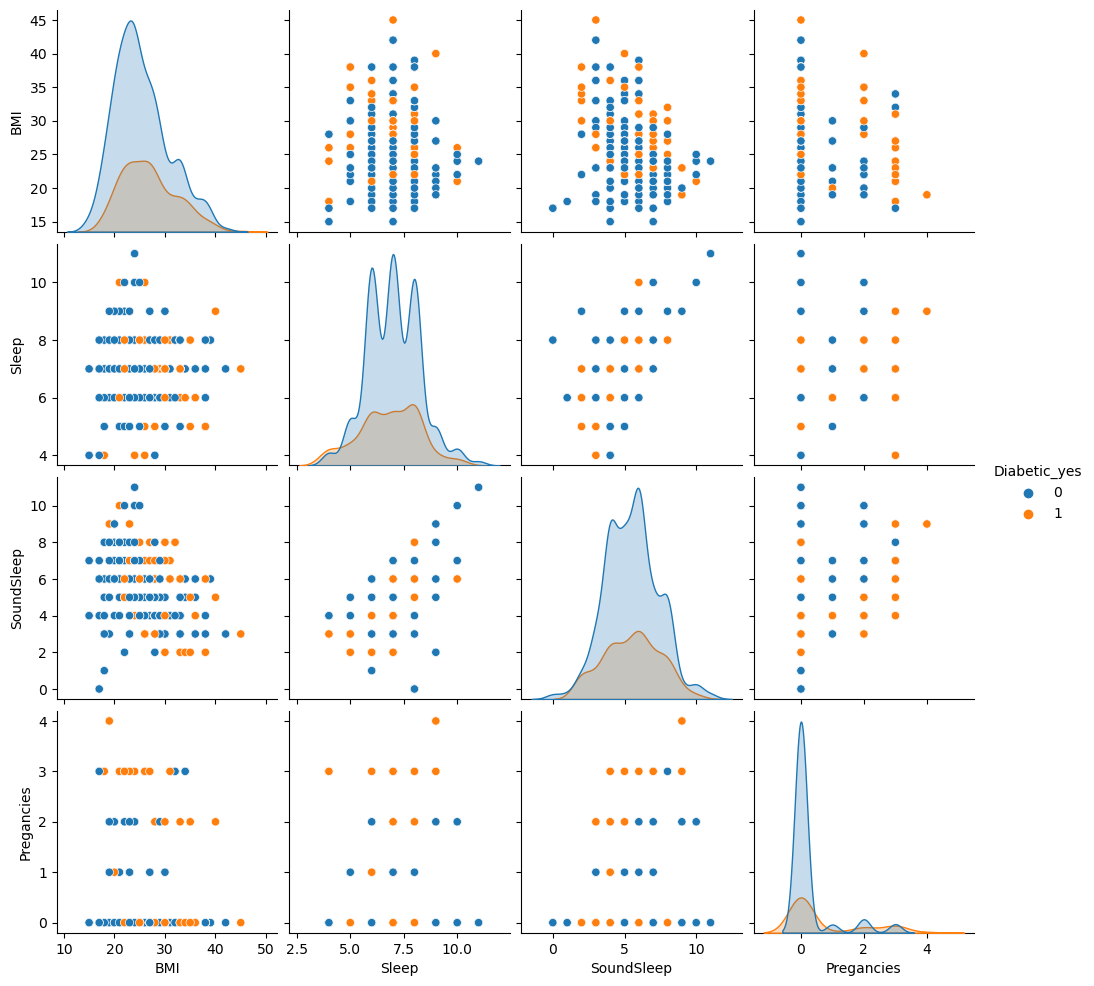

In [52]:
# pair plot
sns.pairplot(diabdata_encoded, hue = "Diabetic_yes")

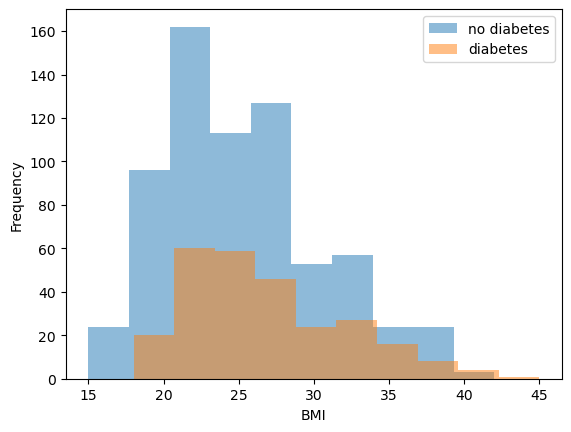

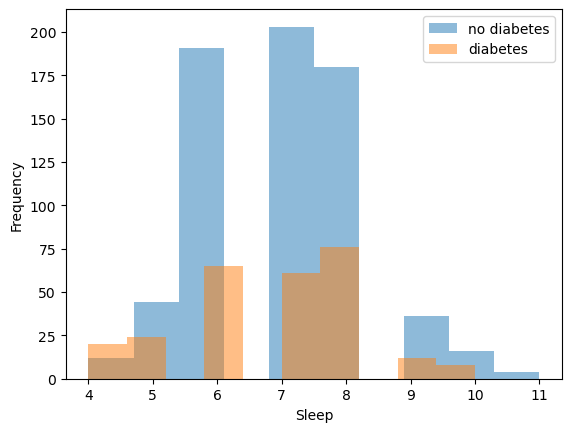

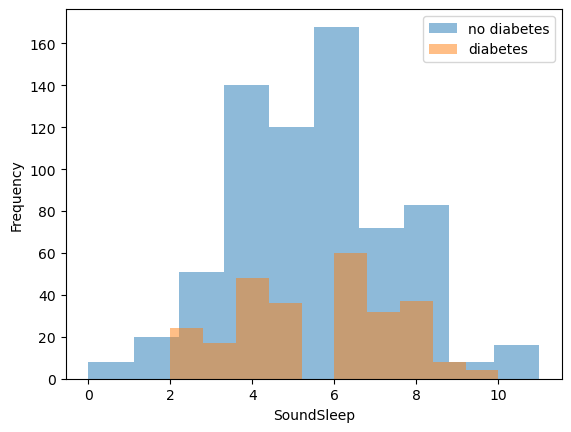

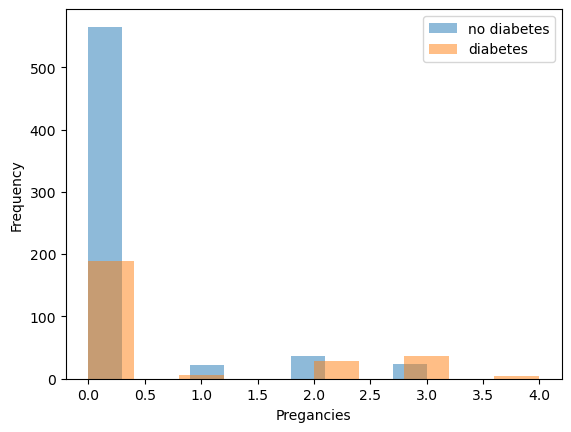

In [53]:
for col in ['BMI', 'Sleep', 'SoundSleep', 'Pregancies']:
    plt.hist(diabdata_encoded[diabdata_encoded['Diabetic_yes'] ==  0][col], 10, alpha = 0.5, label = 'no diabetes')
    plt.hist(diabdata_encoded[diabdata_encoded['Diabetic_yes'] == 1][col], 10, alpha = 0.5, label = 'diabetes')
    plt.legend(loc = 'upper right')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

<Axes: xlabel='Diabetic_yes', ylabel='count'>

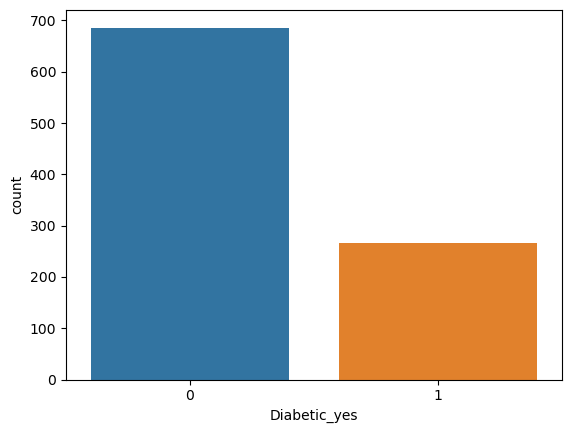

In [56]:
# Counting diabetes outcome
sns.countplot(x = 'Diabetic_yes', data = diabdata_encoded)


C:\Users\Junhee\AppData\Local\Temp\ipykernel_21588\1061305226.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(diabdata_encoded.corr(), annot = True)


<Axes: >

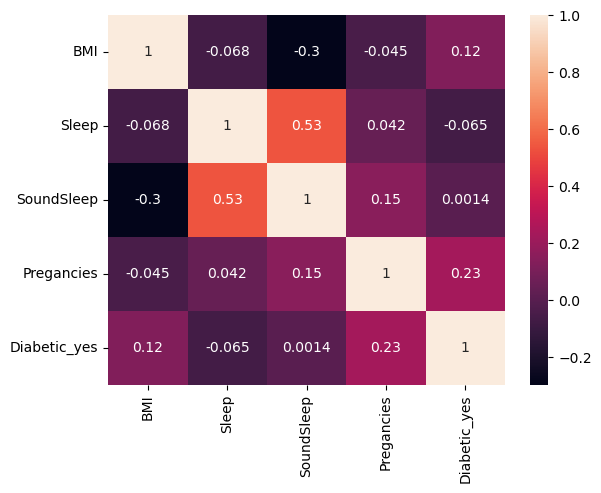

In [57]:
sns.heatmap(diabdata_encoded.corr(), annot = True)

In [59]:
# Dropping low correlation attributes
final_diabdata = diabdata_encoded.drop(['Sleep', 'SoundSleep'], axis = 1)
final_diabdata

Age  Gender Family_Diabetes highBP      PhysicallyActive   BMI  \
0           50-59    Male              no    yes        one hr or more  39.0   
1           50-59    Male              no    yes  less than half an hr  28.0   
2           40-49    Male              no     no        one hr or more  24.0   
3           50-59    Male              no     no        one hr or more  23.0   
4           40-49    Male              no     no  less than half an hr  27.0   
..            ...     ...             ...    ...                   ...   ...   
947  less than 40    Male             yes     no  more than half an hr  25.0   
948   60 or older    Male             yes    yes  more than half an hr  27.0   
949   60 or older    Male              no    yes                  none  23.0   
950   60 or older    Male              no    yes  less than half an hr  27.0   
951   60 or older  Female             yes    yes        one hr or more  30.0   

    Smoking Alcohol RegularMedicine      JunkFood      Stress BPLevel  \
0        no      no              no  occasionally   sometimes    high   
1        no      no             yes    very often   sometimes  normal   
2        no      no              no  occasionally   sometimes  normal   
3        no      no              no  occasionally   sometimes  normal   
4        no      no              no  occasionally   sometimes  normal   
..      ...     ...             ...           ...         ...     ...   
947      no      no              no         often   sometimes  normal   
948      no      no             yes  occasionally   sometimes    high   
949      no      no             yes  occasionally   sometimes    high   
950      no     yes             yes  occasionally  very often    high   
951      no      no             yes  occasionally   sometimes    high   

     Pregancies Pdiabetes UriationFreq  Diabetic_yes  
0           0.0         0     not much             0  
1           0.0         0     not much             0  
2           0.0         0     not much             0  
3           0.0         0     not much             0  
4           0.0         0     not much             0  
..          ...       ...          ...           ...  
947         0.0         0     not much             1  
948         0.0         0  quite often             1  
949         0.0         0     not much             0  
950         0.0         0     not much             0  
951         2.0         0  quite often             1  

[952 rows x 16 columns]

In [7]:
#compute a simple cross tabulation of two (or more) factors
cross_tab_junk_stress = pd.crosstab(diabdata['JunkFood'], diabdata['Stress']) 
#want only first two values of tuple returned from chi2_contingency
#This function computes the chi-square statistic and p-value for the 
#hypothesis test of independence of the observed frequencies in the contingency table
chi2, p_value, df, expvals = chi2_contingency(cross_tab_junk_stress)
print("Chi-square:", chi2)
print("P-value:", p_value)
#We can assume from the low p value that junk food and stress are associated
#However, we will use both since their nature is different

Chi-square: 94.09466967499688
P-value: 2.4470337530291514e-16


In [8]:
cross_tab_junk_blood = pd.crosstab(diabdata['JunkFood'], diabdata['BPLevel']) 
chi2, p_value, df, expvals = chi2_contingency(cross_tab_junk_blood)
print("Chi-square:", chi2)
print("P-value:", p_value)
#Here, we see that junk food as blood pressure are not that highly correlated because the p-val > 0.05
#The chi-square value is also relatively low, demonstraing the above

Chi-square: 24.951722830335264
P-value: 0.05059555690352423


In [9]:
cross_tab_high_blood = pd.crosstab(diabdata['highBP'], diabdata['BPLevel']) 
chi2, p_value, df, expvals = chi2_contingency(cross_tab_high_blood)
print("Chi-square:", chi2)
print("P-value:", p_value)
#As expetced, the variables highBP and BPlevels are highly correlated because they relate both to blood pressure
#Because of the extremely high chi-square and low p-val we are likely to omit one of the two

Chi-square: 482.23875003776743
P-value: 5.439974203257661e-102


In [10]:
diabdata.dropna(subset = ['BMI', 'Sleep', 'SoundSleep'], inplace=True) #drops nan values from quantitative variables for now
diab_quant = diabdata[['BMI', 'Sleep', 'SoundSleep']] #the quantiative variables we want
target = diabdata['Diabetic'] #the label we want to predict
lab_encoder = LabelEncoder() #encode target labels with value between 0 and n_classes-1
target = lab_encoder.fit_transform(target) #transform target lab encoded
#split into 80% train 20% test
X_train, X_test, y_train, y_test = train_test_split(diab_quant, target, test_size = 0.2, random_state = 12)
#knn instant with 5 neighbors
knn_classifier = KNeighborsClassifier(n_neighbors = 5)
knn_classifier.fit(X_train, y_train)
y_pred = knn_classifier.predict(X_test) #show original yes/no's instead of 1/2's
predicted = lab_encoder.inverse_transform(y_pred)
true = lab_encoder.inverse_transform(y_test)
for pred, true in zip(predicted, true):
    print(f"Predicted: {pred}\tTrue: {true}")

Predicted: no	True: no
Predicted: no	True: yes
Predicted: no	True: no
Predicted: no	True: no
Predicted: yes	True: yes
Predicted: no	True: no
Predicted: no	True: no
Predicted: yes	True: yes
Predicted: yes	True: no
Predicted: no	True: no
Predicted: no	True: no
Predicted: yes	True: yes
Predicted: no	True: no
Predicted: yes	True: yes
Predicted: yes	True: no
Predicted: no	True: no
Predicted: no	True: yes
Predicted: no	True: no
Predicted: no	True: no
Predicted: no	True: no
Predicted: yes	True: no
Predicted: no	True: no
Predicted: no	True: no
Predicted: no	True: no
Predicted: no	True: no
Predicted: no	True: no
Predicted: no	True: no
Predicted: yes	True: yes
Predicted: no	True: yes
Predicted: no	True: no
Predicted: yes	True: yes
Predicted: no	True: no
Predicted: no	True: no
Predicted: no	True: no
Predicted: no	True: yes
Predicted: no	True: no
Predicted: no	True: no
Predicted: no	True: no
Predicted: yes	True: yes
Predicted: no	True: no
Predicted: no	True: yes
Predicted: no	True: no
Predicted: n

In [11]:
true_labs = lab_encoder.inverse_transform(y_test) #there was an issue if I didn't inverse transform
predicted = predicted
conf_mat = confusion_matrix(true_labs, predicted)
conf_mat

array([[121,  18],
       [ 23,  28]], dtype=int64)

In [12]:
acc_sco = accuracy_score(true_labs, predicted)
acc_sco

0.7842105263157895

In [13]:
XMLP = diabdata.drop('Diabetic', axis=1)
yMLP = diabdata['Diabetic']
cat_MLP = ['Gender', 'Family_Diabetes', 'PhysicallyActive', 'Smoking', 'Alcohol', 'JunkFood', 'BPLevel']
num_MLP = ['BMI','Sleep','SoundSleep']
#encode categorical variables and scale quantitative
preprocessor_MLP = ColumnTransformer(transformers = [
    ('cat', OneHotEncoder(), cat_MLP),
    ('num', StandardScaler(), num_MLP)
])
XMLP_preproc = preprocessor_MLP.fit_transform(XMLP) #apply preprocessing

#train-test 80-20
X_trainMLP, X_testMLP, y_trainMLP, y_testMLP = train_test_split(XMLP_preproc, yMLP, test_size=0.2, random_state=12)
#using standard MLPClassifier activation and solver, as well as hidden layer sizes of 100 neurons for 2 layers
mlp = MLPClassifier(hidden_layer_sizes = (100,100), activation = 'relu', 
                    solver = 'adam', random_state = 12, max_iter=300)

mlp.fit(X_trainMLP, y_trainMLP)
y_predMLP = mlp.predict(X_testMLP)
accMLP = np.mean(y_predMLP == y_testMLP)
accMLP

0.9631578947368421

In [32]:
from sklearn.model_selection import GridSearchCV

activations = ['relu', 'logistic']
solvers = ['sgd', 'adam']
max_iterations = [1000,1100,1200]
hidden_layer_siz = [(5, 7), (7, 13), (13, 10), (100,100)]
learning_rates = 0.01 * np.arange(1, 3)

param_grid = dict(learning_rate_init = learning_rates, hidden_layer_sizes = hidden_layer_siz, max_iter = max_iterations, activation = activations, solver = solvers)
# set model
mlp = MLPClassifier(solver = 'sgd', random_state = 42, activation = 'logistic', learning_rate_init = 0.3, batch_size = 100, hidden_layer_sizes = (12, 3), max_iter = 500)

# For Grid Search
grid = GridSearchCV(estimator = mlp, param_grid = param_grid)

grid.fit(X_trainMLP,y_trainMLP)

print("Optimal Hyper-parameters : ", grid.best_params_)
print("Optimal Accuracy : ", grid.best_score_)

c:\Users\jpsal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Optimal Hyper-parameters :  {'activation': 'logistic', 'hidden_layer_sizes': (100, 100), 'learning_rate_init': 0.02, 'max_iter': 1000, 'solver': 'adam'}
Optimal Accuracy :  0.922168002788428


In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import OneClassSVM
from numpy import where
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.naive_bayes import GaussianNB

In [2]:
diabdata = pd.read_csv('diabetes_dataset__2019.csv')

In [3]:
diabdata.head()

Age Gender Family_Diabetes highBP      PhysicallyActive   BMI Smoking  \
0  50-59   Male              no    yes        one hr or more  39.0      no   
1  50-59   Male              no    yes  less than half an hr  28.0      no   
2  40-49   Male              no     no        one hr or more  24.0      no   
3  50-59   Male              no     no        one hr or more  23.0      no   
4  40-49   Male              no     no  less than half an hr  27.0      no   

  Alcohol  Sleep  SoundSleep RegularMedicine      JunkFood     Stress BPLevel  \
0      no      8           6              no  occasionally  sometimes    high   
1      no      8           6             yes    very often  sometimes  normal   
2      no      6           6              no  occasionally  sometimes  normal   
3      no      8           6              no  occasionally  sometimes  normal   
4      no      8           8              no  occasionally  sometimes  normal   

   Pregancies Pdiabetes UriationFreq Diabetic  
0         0.0         0     not much       no  
1         0.0         0     not much       no  
2         0.0         0     not much       no  
3         0.0         0     not much       no  
4         0.0         0     not much       no

In [4]:
diabdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 952 entries, 0 to 951
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               952 non-null    object 
 1   Gender            952 non-null    object 
 2   Family_Diabetes   952 non-null    object 
 3   highBP            952 non-null    object 
 4   PhysicallyActive  952 non-null    object 
 5   BMI               948 non-null    float64
 6   Smoking           952 non-null    object 
 7   Alcohol           952 non-null    object 
 8   Sleep             952 non-null    int64  
 9   SoundSleep        952 non-null    int64  
 10  RegularMedicine   952 non-null    object 
 11  JunkFood          952 non-null    object 
 12  Stress            952 non-null    object 
 13  BPLevel           952 non-null    object 
 14  Pregancies        910 non-null    float64
 15  Pdiabetes         951 non-null    object 
 16  UriationFreq      952 non-null    object 
 1

In [5]:
# Label Encoding
label_encode = LabelEncoder()
diabdata['Age'] = label_encode.fit_transform(diabdata['Age']).astype(float)
diabdata['PhysicallyActive'] = label_encode.fit_transform(diabdata['PhysicallyActive']).astype(float)
diabdata['JunkFood'] = label_encode.fit_transform(diabdata['JunkFood']).astype(float)
diabdata['Stress'] = label_encode.fit_transform(diabdata['Stress']).astype(float)
diabdata['BPLevel'] = label_encode.fit_transform(diabdata['BPLevel']).astype(float)
diabdata['UriationFreq'] = label_encode.fit_transform(diabdata['UriationFreq']).astype(float)
diabdata

Age  Gender Family_Diabetes highBP  PhysicallyActive   BMI Smoking  \
0    1.0    Male              no    yes               3.0  39.0      no   
1    1.0    Male              no    yes               0.0  28.0      no   
2    0.0    Male              no     no               3.0  24.0      no   
3    1.0    Male              no     no               3.0  23.0      no   
4    0.0    Male              no     no               0.0  27.0      no   
..   ...     ...             ...    ...               ...   ...     ...   
947  3.0    Male             yes     no               1.0  25.0      no   
948  2.0    Male             yes    yes               1.0  27.0      no   
949  2.0    Male              no    yes               2.0  23.0      no   
950  2.0    Male              no    yes               0.0  27.0      no   
951  2.0  Female             yes    yes               3.0  30.0      no   

    Alcohol  Sleep  SoundSleep RegularMedicine  JunkFood  Stress  BPLevel  \
0        no      8           6              no       1.0     2.0      2.0   
1        no      8           6             yes       3.0     2.0      4.0   
2        no      6           6              no       1.0     2.0      4.0   
3        no      8           6              no       1.0     2.0      4.0   
4        no      8           8              no       1.0     2.0      4.0   
..      ...    ...         ...             ...       ...     ...      ...   
947      no      8           6              no       2.0     2.0      4.0   
948      no      6           5             yes       1.0     2.0      2.0   
949      no      6           5             yes       1.0     2.0      2.0   
950     yes      6           5             yes       1.0     3.0      2.0   
951      no      7           4             yes       1.0     2.0      2.0   

     Pregancies Pdiabetes  UriationFreq Diabetic  
0           0.0         0           0.0       no  
1           0.0         0           0.0       no  
2           0.0         0           0.0       no  
3           0.0         0           0.0       no  
4           0.0         0           0.0       no  
..          ...       ...           ...      ...  
947         0.0         0           0.0      yes  
948         0.0         0           1.0      yes  
949         0.0         0           0.0       no  
950         0.0         0           0.0       no  
951         2.0         0           1.0      yes  

[952 rows x 18 columns]

In [6]:
diabdata_new = pd.get_dummies(diabdata, columns = ['Gender','Family_Diabetes', 'highBP', 'Smoking', 'Alcohol', 'RegularMedicine', 'Diabetic'])
diabdata_new = diabdata_new.drop(['highBP_no','Family_Diabetes_no', 'Smoking_no', 'Alcohol_no', 'Gender_Female', 'RegularMedicine_no', 'RegularMedicine_o', 'Diabetic_ no', 'Diabetic_no'], axis = 1)
diabdata_new['Gender_Male'] = diabdata_new['Gender_Male'].astype(float)
diabdata_new['Family_Diabetes_yes'] = diabdata_new['Family_Diabetes_yes'].astype(float)
diabdata_new['highBP_yes'] = diabdata_new['highBP_yes'].astype(float)
diabdata_new['Smoking_yes'] = diabdata_new['Smoking_yes'].astype(float)
diabdata_new['Alcohol_yes'] = diabdata_new['Alcohol_yes'].astype(float)
diabdata_new['RegularMedicine_yes'] = diabdata_new['RegularMedicine_yes'].astype(float)
diabdata_new

Age  PhysicallyActive   BMI  Sleep  SoundSleep  JunkFood  Stress  \
0    1.0               3.0  39.0      8           6       1.0     2.0   
1    1.0               0.0  28.0      8           6       3.0     2.0   
2    0.0               3.0  24.0      6           6       1.0     2.0   
3    1.0               3.0  23.0      8           6       1.0     2.0   
4    0.0               0.0  27.0      8           8       1.0     2.0   
..   ...               ...   ...    ...         ...       ...     ...   
947  3.0               1.0  25.0      8           6       2.0     2.0   
948  2.0               1.0  27.0      6           5       1.0     2.0   
949  2.0               2.0  23.0      6           5       1.0     2.0   
950  2.0               0.0  27.0      6           5       1.0     3.0   
951  2.0               3.0  30.0      7           4       1.0     2.0   

     BPLevel  Pregancies Pdiabetes  UriationFreq  Gender_Male  \
0        2.0         0.0         0           0.0          1.0   
1        4.0         0.0         0           0.0          1.0   
2        4.0         0.0         0           0.0          1.0   
3        4.0         0.0         0           0.0          1.0   
4        4.0         0.0         0           0.0          1.0   
..       ...         ...       ...           ...          ...   
947      4.0         0.0         0           0.0          1.0   
948      2.0         0.0         0           1.0          1.0   
949      2.0         0.0         0           0.0          1.0   
950      2.0         0.0         0           0.0          1.0   
951      2.0         2.0         0           1.0          0.0   

     Family_Diabetes_yes  highBP_yes  Smoking_yes  Alcohol_yes  \
0                    0.0         1.0          0.0          0.0   
1                    0.0         1.0          0.0          0.0   
2                    0.0         0.0          0.0          0.0   
3                    0.0         0.0          0.0          0.0   
4                    0.0         0.0          0.0          0.0   
..                   ...         ...          ...          ...   
947                  1.0         0.0          0.0          0.0   
948                  1.0         1.0          0.0          0.0   
949                  0.0         1.0          0.0          0.0   
950                  0.0         1.0          0.0          1.0   
951                  1.0         1.0          0.0          0.0   

     RegularMedicine_yes  Diabetic_yes  
0                    0.0             0  
1                    1.0             0  
2                    0.0             0  
3                    0.0             0  
4                    0.0             0  
..                   ...           ...  
947                  0.0             1  
948                  1.0             1  
949                  1.0             0  
950                  1.0             0  
951                  1.0             1  

[952 rows x 18 columns]

In [7]:
# checking null value
diabdata_new.isnull().sum()

Age                     0
PhysicallyActive        0
BMI                     4
Sleep                   0
SoundSleep              0
JunkFood                0
Stress                  0
BPLevel                 0
Pregancies             42
Pdiabetes               1
UriationFreq            0
Gender_Male             0
Family_Diabetes_yes     0
highBP_yes              0
Smoking_yes             0
Alcohol_yes             0
RegularMedicine_yes     0
Diabetic_yes            0
dtype: int64

In [8]:
# putting 0 for null value
diabdata_new[['BMI', 'Pregancies', 'Pdiabetes']] = diabdata[['BMI', 'Pregancies', 'Pdiabetes']].replace(np.NaN, 0)
diabdata_new.isnull().sum()

Age                    0
PhysicallyActive       0
BMI                    0
Sleep                  0
SoundSleep             0
JunkFood               0
Stress                 0
BPLevel                0
Pregancies             0
Pdiabetes              0
UriationFreq           0
Gender_Male            0
Family_Diabetes_yes    0
highBP_yes             0
Smoking_yes            0
Alcohol_yes            0
RegularMedicine_yes    0
Diabetic_yes           0
dtype: int64

In [9]:
# total rows(observations) and columns(attributess)
diabdata_new.shape

(952, 18)

In [10]:
# summary statistics for quantiative variables
diabdata_new.describe()

Age  PhysicallyActive         BMI       Sleep  SoundSleep  \
count  952.000000        952.000000  952.000000  952.000000  952.000000   
mean     2.004202          1.231092   25.655462    6.949580    5.495798   
std      1.169173          1.153407    5.643174    1.273189    1.865618   
min      0.000000          0.000000    0.000000    4.000000    0.000000   
25%      1.000000          0.000000   22.000000    6.000000    4.000000   
50%      3.000000          1.000000   24.000000    7.000000    6.000000   
75%      3.000000          2.000000   29.000000    8.000000    7.000000   
max      3.000000          3.000000   45.000000   11.000000   11.000000   

         JunkFood      Stress     BPLevel  Pregancies  UriationFreq  \
count  952.000000  952.000000  952.000000  952.000000    952.000000   
mean     1.256303    1.844538    3.501050    0.369748      0.302521   
std      0.626662    0.813265    0.882115    0.892691      0.459591   
min      0.000000    0.000000    0.000000    0.000000      0.000000   
25%      1.000000    2.000000    3.000000    0.000000      0.000000   
50%      1.000000    2.000000    4.000000    0.000000      0.000000   
75%      1.000000    2.000000    4.000000    0.000000      1.000000   
max      3.000000    3.000000    5.000000    4.000000      1.000000   

       Gender_Male  Family_Diabetes_yes  highBP_yes  Smoking_yes  Alcohol_yes  \
count   952.000000           952.000000  952.000000   952.000000   952.000000   
mean      0.609244             0.476891    0.239496     0.113445     0.201681   
std       0.488176             0.499728    0.427000     0.317303     0.401466   
min       0.000000             0.000000    0.000000     0.000000     0.000000   
25%       0.000000             0.000000    0.000000     0.000000     0.000000   
50%       1.000000             0.000000    0.000000     0.000000     0.000000   
75%       1.000000             1.000000    0.000000     0.000000     0.000000   
max       1.000000             1.000000    1.000000     1.000000     1.000000   

       RegularMedicine_yes  Diabetic_yes  
count           952.000000    952.000000  
mean              0.352941      0.279412  
std               0.478136      0.448946  
min               0.000000      0.000000  
25%               0.000000      0.000000  
50%               0.000000      0.000000  
75%               1.000000      1.000000  
max               1.000000      1.000000

This is the end of Exploratory Data Analysis
Next part is Data Visualization

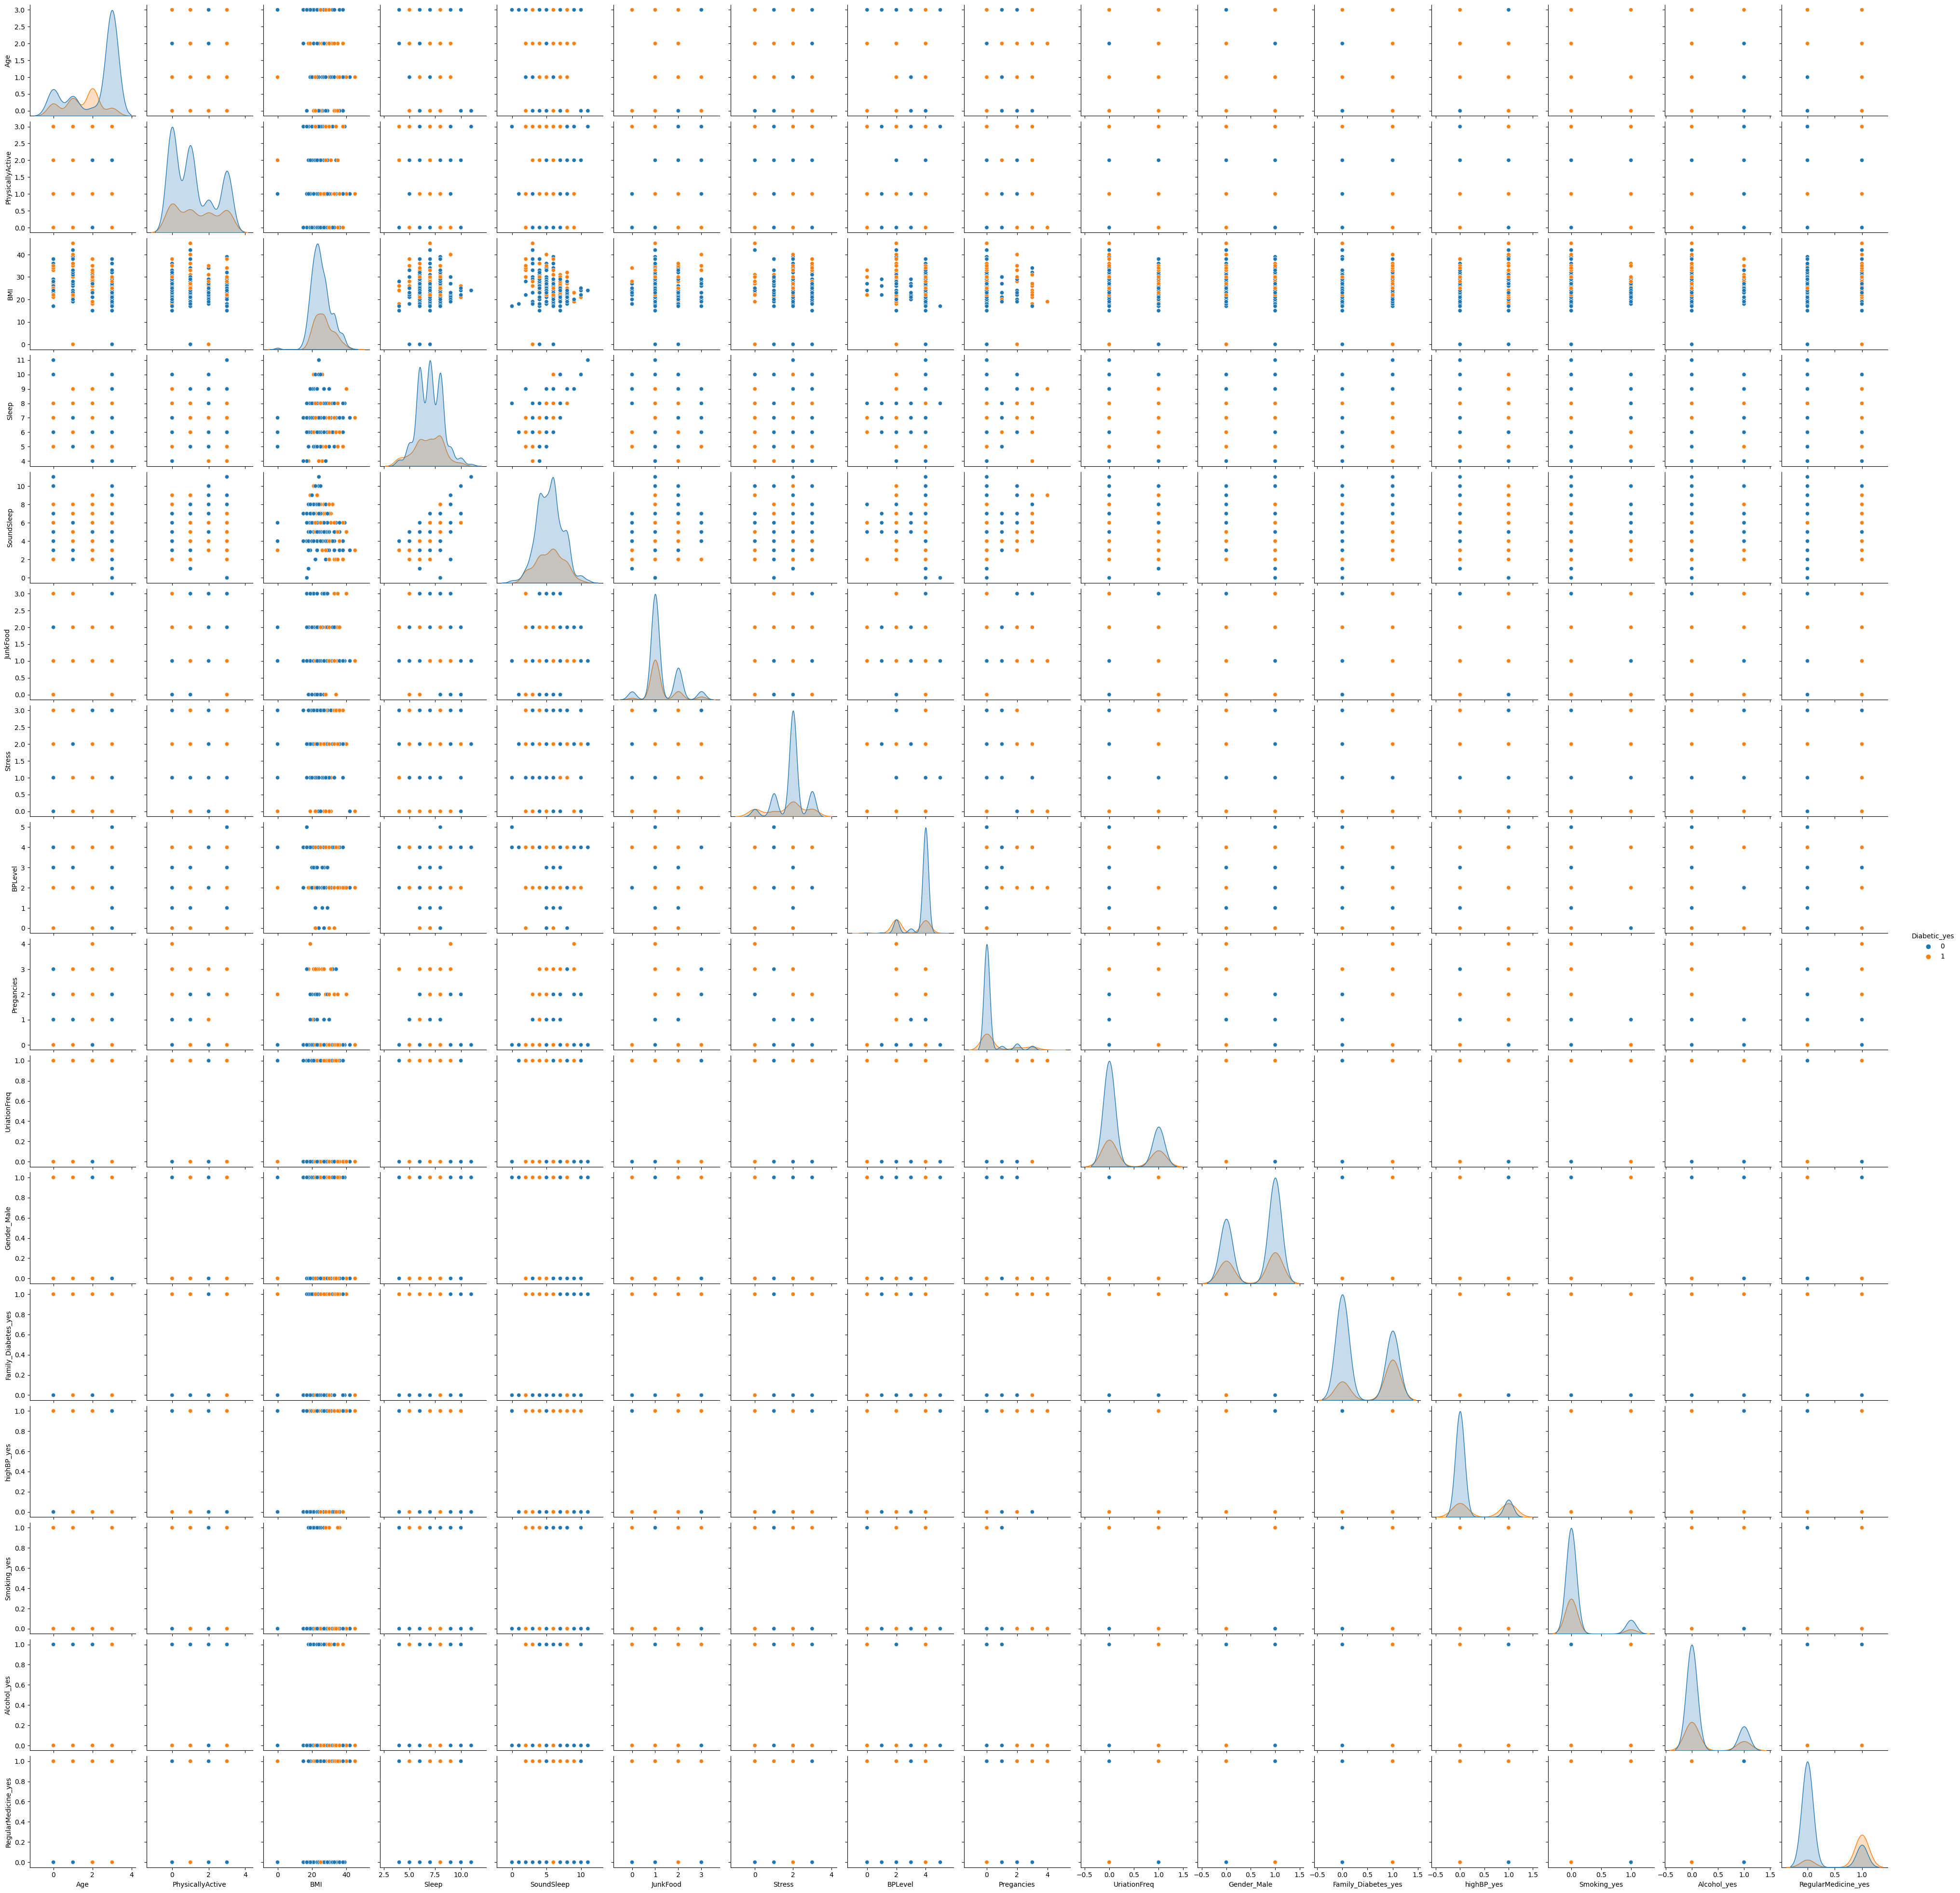

In [11]:
# pair plot
sns.pairplot(diabdata_new, hue = "Diabetic_yes")

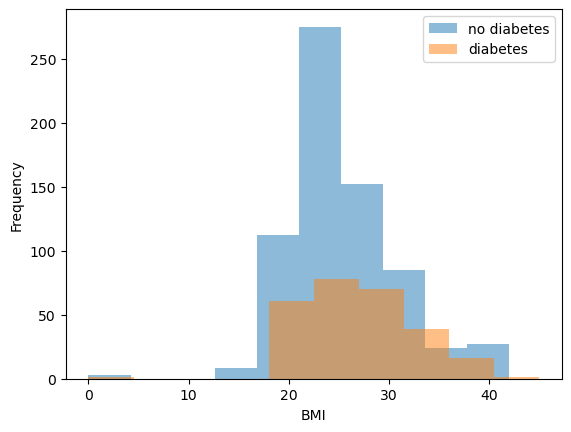

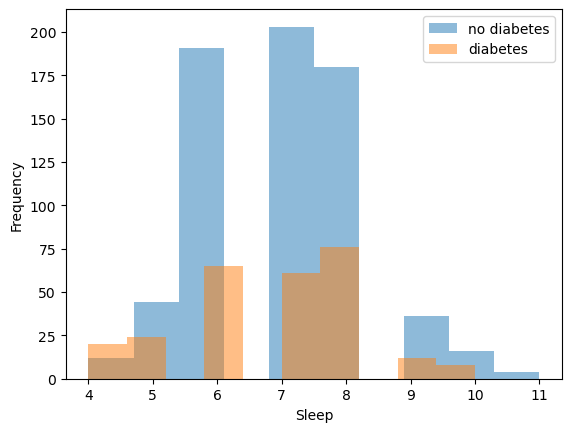

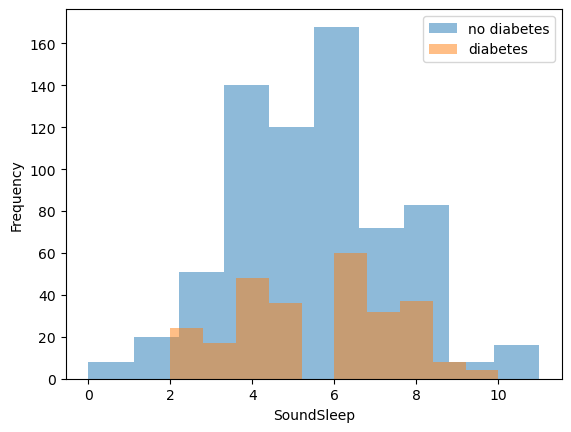

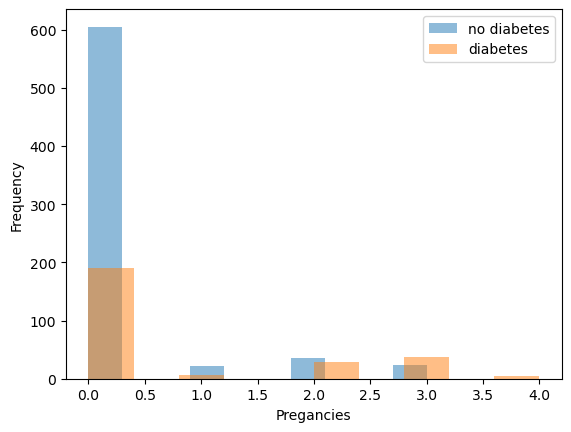

In [12]:
for col in ['BMI', 'Sleep', 'SoundSleep', 'Pregancies']:
    plt.hist(diabdata_new[diabdata_new['Diabetic_yes'] ==  0][col], 10, alpha = 0.5, label = 'no diabetes')
    plt.hist(diabdata_new[diabdata_new['Diabetic_yes'] == 1][col], 10, alpha = 0.5, label = 'diabetes')
    plt.legend(loc = 'upper right')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

<Axes: xlabel='Diabetic_yes', ylabel='count'>

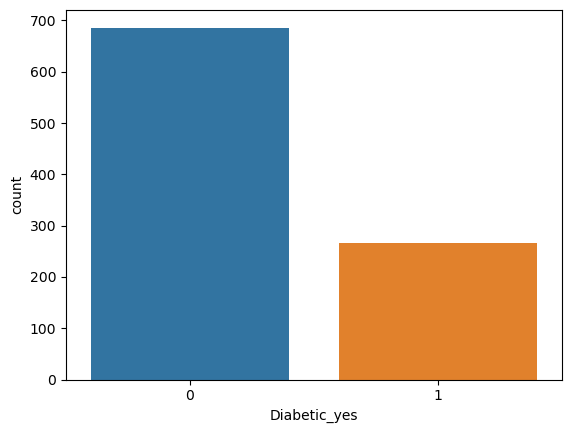

In [13]:
# Counting diabetes outcome
sns.countplot(x = 'Diabetic_yes', data = diabdata_new)

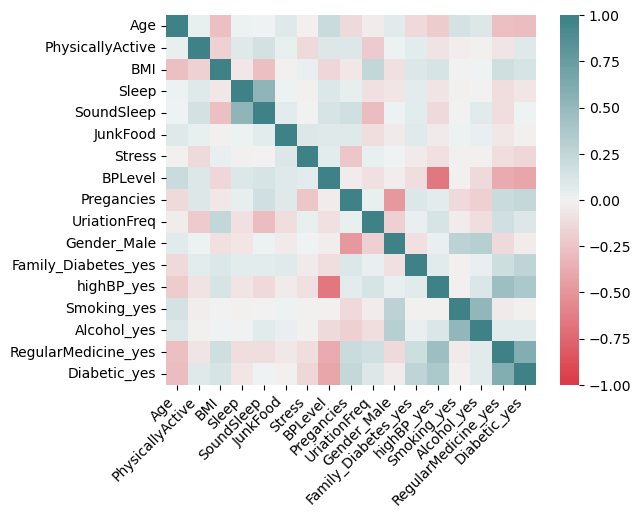

In [14]:
corr = diabdata_new.corr()
corr
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(10, 200, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [15]:
# Dropping low correlation attributes
final_diabdata = diabdata_new.drop(['PhysicallyActive','Sleep','SoundSleep','JunkFood','UriationFreq','Gender_Male','Smoking_yes','Alcohol_yes', 'Pdiabetes'], axis = 1)
final_diabdata

Age   BMI  Stress  BPLevel  Pregancies  Family_Diabetes_yes  highBP_yes  \
0    1.0  39.0     2.0      2.0         0.0                  0.0         1.0   
1    1.0  28.0     2.0      4.0         0.0                  0.0         1.0   
2    0.0  24.0     2.0      4.0         0.0                  0.0         0.0   
3    1.0  23.0     2.0      4.0         0.0                  0.0         0.0   
4    0.0  27.0     2.0      4.0         0.0                  0.0         0.0   
..   ...   ...     ...      ...         ...                  ...         ...   
947  3.0  25.0     2.0      4.0         0.0                  1.0         0.0   
948  2.0  27.0     2.0      2.0         0.0                  1.0         1.0   
949  2.0  23.0     2.0      2.0         0.0                  0.0         1.0   
950  2.0  27.0     3.0      2.0         0.0                  0.0         1.0   
951  2.0  30.0     2.0      2.0         2.0                  1.0         1.0   

     RegularMedicine_yes  Diabetic_yes  
0                    0.0             0  
1                    1.0             0  
2                    0.0             0  
3                    0.0             0  
4                    0.0             0  
..                   ...           ...  
947                  0.0             1  
948                  1.0             1  
949                  1.0             0  
950                  1.0             0  
951                  1.0             1  

[952 rows x 9 columns]

In [16]:
final_diabdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 952 entries, 0 to 951
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  952 non-null    float64
 1   BMI                  952 non-null    float64
 2   Stress               952 non-null    float64
 3   BPLevel              952 non-null    float64
 4   Pregancies           952 non-null    float64
 5   Family_Diabetes_yes  952 non-null    float64
 6   highBP_yes           952 non-null    float64
 7   RegularMedicine_yes  952 non-null    float64
 8   Diabetic_yes         952 non-null    uint8  
dtypes: float64(8), uint8(1)
memory usage: 60.6 KB


In [17]:
# Naive Bayes Model
X = final_diabdata.drop("Diabetic_yes", axis = 1)
y = final_diabdata[["Diabetic_yes"]]

# split dataset into training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 12)

naive_model = GaussianNB()
naive_model.fit(X_train, y_train.values.ravel())
y_pred = naive_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.8272251308900523
              precision    recall  f1-score   support

           0       0.86      0.90      0.88       133
           1       0.75      0.66      0.70        58

    accuracy                           0.83       191
   macro avg       0.80      0.78      0.79       191
weighted avg       0.82      0.83      0.82       191

[[120  13]
 [ 20  38]]


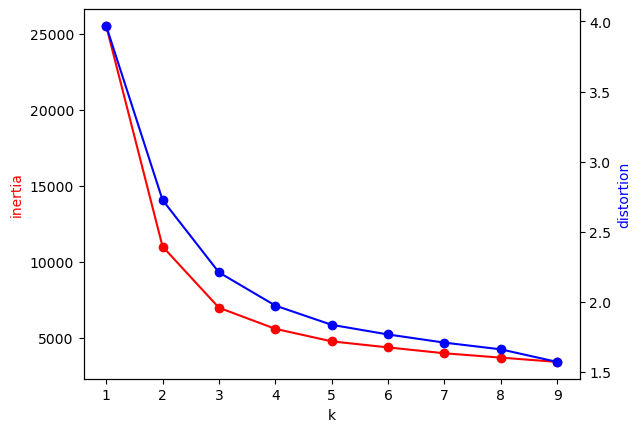

In [41]:
# finding optimal number k clusters via elbow method (k means)

distortions = [] # Sum of squared distances between samples and their closest cluster center
inertias = [] # Average of SSE between points and their assigned centroid
K = range(1,10)

for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X_train)
    kmeanModel.fit(X_train)
    distortions.append(sum(np.min(cdist(X_train, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)


# plot inertia and distortion
inertia = plt.subplot()
inertia.plot(K, inertias, marker='o', color='red')
inertia.set_xlabel('k')
inertia.set_ylabel('inertia',color='red')

distortion=inertia.twinx()
distortion.plot(K, distortions, color='blue', marker='o')
distortion.set_ylabel('distortion',color='blue')
plt.show()


In [36]:
# observe that distortion score line appears to become more linear at k = 3
# knn instant with n=3 neighbors 
knn_classifier = KNeighborsClassifier(n_neighbors = 3)
knn_classifier.fit(X_train, y_train)
y_pred = knn_classifier.predict(X_test) 

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9267015706806283
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       133
           1       0.96      0.79      0.87        58

    accuracy                           0.93       191
   macro avg       0.94      0.89      0.91       191
weighted avg       0.93      0.93      0.92       191

[[131   2]
 [ 12  46]]


/Users/aatishlobo/anaconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/aatishlobo/anaconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [21]:
XMLP = final_diabdata.drop('Diabetic_yes', axis=1)
yMLP = final_diabdata['Diabetic_yes']

#encode categorical variables and scale quantitative
preprocessor_MLP = ColumnTransformer(transformers = [
    ('num', StandardScaler(), yMLP)
])

XMLP_preproc = preprocessor_MLP.fit_transform(XMLP) #apply preprocessing

#train-test 80-20
X_trainMLP, X_testMLP, y_trainMLP, y_testMLP = train_test_split(XMLP_preproc, yMLP, test_size=0.2, random_state=12)
#using standard MLPClassifier activation and solver, as well as hidden layer sizes of 100 neurons for 2 layers
mlp = MLPClassifier(hidden_layer_sizes = (100,100), activation = 'relu', 
                    solver = 'adam', random_state = 12, max_iter=300)

mlp.fit(X_trainMLP, y_trainMLP)
y_predMLP = mlp.predict(X_testMLP)
accMLP = np.mean(y_predMLP == y_testMLP)
accMLP

0.7801047120418848

In [26]:
from sklearn.model_selection import GridSearchCV

activations = ['relu', 'logistic']
solvers = ['sgd', 'adam']
max_iterations = [1000,1100,1200]
hidden_layer_siz = [(5, 7), (7, 13), (13, 10), (100,100)]
learning_rates = 0.01 * np.arange(1, 3)

param_grid = dict(learning_rate_init = learning_rates, hidden_layer_sizes = hidden_layer_siz, max_iter = max_iterations, activation = activations, solver = solvers)
# set model
mlp = MLPClassifier(solver = 'sgd', random_state = 42, activation = 'logistic', learning_rate_init = 0.3, batch_size = 100, hidden_layer_sizes = (12, 3), max_iter = 500)

# For Grid Search
grid = GridSearchCV(estimator = mlp, param_grid = param_grid)

grid.fit(X_trainMLP,y_trainMLP)

print("Optimal Hyper-parameters : ", grid.best_params_)
print("Optimal Accuracy : ", grid.best_score_)

Optimal Hyper-parameters :  {'activation': 'logistic', 'hidden_layer_sizes': (100, 100), 'learning_rate_init': 0.01, 'max_iter': 1000, 'solver': 'adam'}
Optimal Accuracy :  0.8212762297901618
